In [1]:
import pandas as pd

# Set the display options to show all columns, rows and overrride scientific notation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x : '%.2f' %x)

In [2]:
#import category_encoders as ce

## import scikit-learn packages

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [4]:
mtn_data = pd.read_csv('updated_summaries_1.csv')

mtn_data.head(2)

/apps/conda/fiona.kamau/envs/tanda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


kyc_merchant_code  kyc_momo_account_number  \
0    635070@momopay             256776802727   
1    616862@momopay             256770624321   

                                        id_number_ah kyc_merchant_type  \
0                   BBA52A740FAD2FDEBC08BBB343B5749B          BUSINESS   
1  257D69261D4092DA729EDA6424DA0CACBB1E1A2772ABCB...          BUSINESS   

  kyc_id_type  kyc_business_type   kyc_id_num            KYC_BUSINESS_NAME  \
0        NRIN              -4.00  CERT_129947      PHARMACY CHOICE LIMITED   
1        NRIN              -4.00           -4  ELIVIA  PHARMACEUTICALS LTD   

            KYC_FIRST_NAME KYC_LAST_NAME  kyc_first_name_2  kyc_last_name_2  \
0          PHARMACY CHOICE       LIMITED             -4.00            -4.00   
1  ELIVIA  PHARMACEUTICALS           LTD             -4.00            -4.00   

  mom_registration_date                    profile MoMoPay_fst_actvty_date  \
0   2022-06-06 00:00:00  MTNU MoMoPay Chain Stores     2022-06-16 18:50:00   
1   2022-01-14 00:00:00      MTNU MoMoPay Standard     2022-01-19 16:41:00   

  date_last_receipt_into_momopay_wallet  \
0                   2023-05-04 21:17:00   
1                   2023-05-04 22:21:00   

  date_last_transfer_from_momopay_to_mobile_money  \
0                                              -4   
1                                              -4   

  date_last_transfer_from_momopay_to_bank  MOM_momo_TransactionsPerDay  \
0                     2023-05-04 23:29:00                         3.00   
1                     2023-05-04 23:12:00                         3.00   

   MOM_momo_PAYMENT_QTY_6M  MOM_momo_PAYMENT_QTY_3M  MOM_momo_PAYMENT_QTY_1M  \
0                   506.00                   277.00                    98.00   
1                   463.00                   253.00                    92.00   

   MOM_momo_PAYMENT_QTY_1D  MOM_momo_PAYMENT_AMT_6M  MOM_momo_PAYMENT_AMT_3M  \
0                     3.00              19217300.00               9974000.00   
1                     4.00              52008699.00              29162900.00   

   MOM_momo_PAYMENT_AMT_1M  DAY_momo_PAYMENT_AMT  \
0               3112600.00             112000.00   
1               8878450.00             214500.00   

   MOM_momo_PAYMENT_ACCEPTORS_6M  MOM_momo_PAYMENT_ACCEPTORS_3M  \
0                         301.00                         188.00   
1                         205.00                         116.00   

   MOM_momo_PAYMENT_ACCEPTORS_1M  DAY_momo_PAYMENT_ACCEPTORS  \
0                          79.00                        3.00   
1                          58.00                        4.00   

   MOM_momo_PAYMENT_MAX_AMT_6M  MOM_momo_PAYMENT_MAX_AMT_3M  \
0                    326000.00                    255000.00   
1                   1500000.00                   1500000.00   

   MOM_momo_PAYMENT_MAX_AMT_1M  DAY_momo_PAYMENT_MAX_AMT  \
0                    116000.00                  52000.00   
1                    723200.00                 105000.00   

  MOM_momo_PAYMENT_LAST_DATE  MOM_momo_Withdrawal  \
0        2023-04-05 21:17:00           3852140.00   
1        2023-04-05 22:21:00           6265791.00   

   MOM_momo_Till_Wallet_QTY_6M  MOM_momo_Till_Wallet_QTY_3M  \
0                        -4.00                        -4.00   
1                        -4.00                        -4.00   

   MOM_momo_Till_Wallet_QTY_1M  DAY_momo_Till_Wallet_QTY  \
0                        -4.00                     -4.00   
1                        -4.00                     -4.00   

   MOM_momo_Till_Bank_QTY_6M  MOM_momo_Till_Bank_QTY_3M  \
0                      19.00                      12.00   
1                     145.00                      99.00   

   MOM_momo_Till_Bank_QTY_1M  DAY_momo_Till_Bank_QTY  \
0                       4.00                    1.00   
1                      33.00                    2.00   

   MOM_momo_Till_Wallet_AMT_6M  MOM_momo_Till_Wallet_AMT_3M  \
0                        -4.00                        -4.00   
1   

In [5]:
mtn_data.shape

(104851, 114)

In [6]:
mtn_data[['kyc_merchant_code', 'temp']] = mtn_data['kyc_merchant_code'].str.split('@', expand = True)

mtn_data.drop('temp', axis = 'columns', inplace = True)

In [7]:
import seaborn as sns
sns.set_style('darkgrid')

(0.0, 0.05)

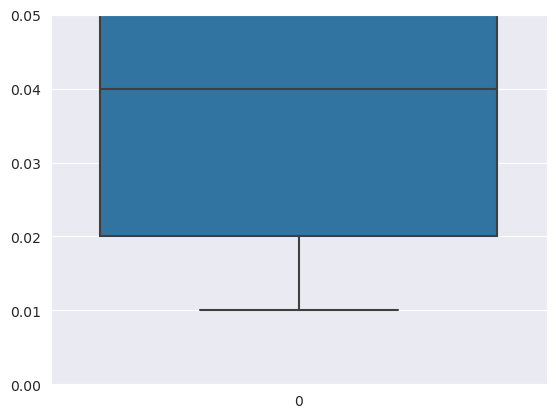

In [6]:
sns.boxplot(mtn_data['trading_consistency']) ## average is 0.04 and outliers ar


plt.ylim(0,0.05)

In [7]:
mtn_data[['trading_consistency']].describe().T

count  mean  std  min  25%  50%  75%  max
trading_consistency 104851.00  0.14 0.23 0.01 0.02 0.04 0.13 1.00

In [8]:
mtn_data[mtn_data['trading_consistency'] >= 0][['trading_consistency']].describe().T

count  mean  std  min  25%  50%  75%  max
trading_consistency 104851.00  0.14 0.23 0.01 0.02 0.04 0.13 1.00

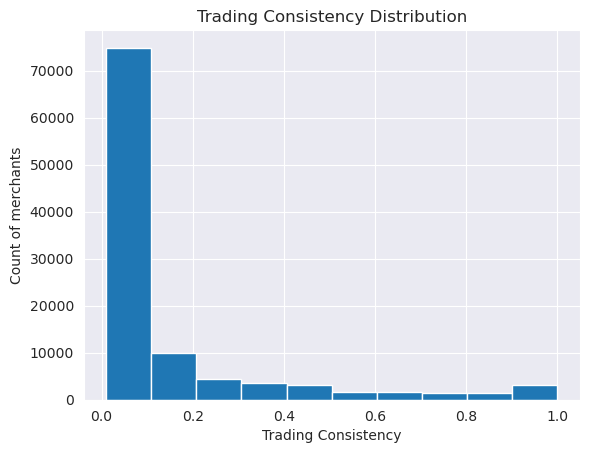

In [12]:
plt.hist(mtn_data['trading_consistency'])

plt.title('Trading Consistency Distribution')

plt.ylabel('Count of merchants')
plt.xlabel('Trading Consistency')

plt.show()

In [19]:
mtn_data.isnull().sum()

kyc_merchant_code                                        0
kyc_momo_account_number                                  0
id_number_ah                                             0
kyc_merchant_type                                        0
kyc_id_type                                              0
kyc_business_type                                        0
kyc_id_num                                               0
KYC_BUSINESS_NAME                                        0
KYC_FIRST_NAME                                           0
KYC_LAST_NAME                                            0
kyc_first_name_2                                         0
kyc_last_name_2                                          0
mom_registration_date                                    0
profile                                                  0
MoMoPay_fst_actvty_date                                  0
date_last_receipt_into_momopay_wallet                    0
date_last_transfer_from_momopay_to_mobile_money         

In [10]:
mtn_data.describe().T

count            mean  \
kyc_momo_account_number                            104851.00 256773560734.24   
kyc_business_type                                  104851.00           -4.00   
kyc_first_name_2                                   104851.00           -4.00   
kyc_last_name_2                                    104851.00           -4.00   
MOM_momo_TransactionsPerDay                        104851.00            2.35   
MOM_momo_PAYMENT_QTY_6M                            104851.00           72.90   
MOM_momo_PAYMENT_QTY_3M                            104851.00           41.42   
MOM_momo_PAYMENT_QTY_1M                            104851.00           15.23   
MOM_momo_PAYMENT_QTY_1D                            104851.00            0.52   
MOM_momo_PAYMENT_AMT_6M                            104851.00      7147889.71   
MOM_momo_PAYMENT_AMT_3M                            104851.00      3787822.66   
MOM_momo_PAYMENT_AMT_1M                            104851.00      1303307.92   
DAY_momo_PAYMENT_AMT                               104851.00        47678.34   
MOM_momo_PAYMENT_ACCEPTORS_6M                      104851.00           32.36   
MOM_momo_PAYMENT_ACCEPTORS_3M                      104851.00           20.15   
MOM_momo_PAYMENT_ACCEPTORS_1M                      104851.00            8.72   
DAY_momo_PAYMENT_ACCEPTORS                         104851.00            0.45   
MOM_momo_PAYMENT_MAX_AMT_6M                        104851.00       190528.87   
MOM_momo_PAYMENT_MAX_AMT_3M                        104851.00       144604.82   
MOM_momo_PAYMENT_MAX_AMT_1M                        104851.00        94106.92   
DAY_momo_PAYMENT_MAX_AMT                           104851.00        17677.11   
MOM_momo_Withdrawal                                104851.00       849942.92   
MOM_momo_Till_Wallet_QTY_6M                        104851.00            7.14   
MOM_momo_Till_Wallet_QTY_3M                        104851.00            2.99   
MOM_momo_Till_Wallet_QTY_1M                        104851.00           -0.41   
DAY_momo_Till_Wallet_QTY                           104851.00           -2.39   
MOM_momo_Till_Bank_QTY_6M                          104851.00           -3.23   
MOM_momo_Till_Bank_QTY_3M                          104851.00           -3.54   
MOM_momo_Till_Bank_QTY_1M                          104851.00           -3.78   
DAY_momo_Till_Bank_QTY                             104851.00           -3.90   
MOM_momo_Till_Wallet_AMT_6M                        104851.00      2103308.28   
MOM_momo_Till_Wallet_AMT_3M                        104851.00      1123362.79   
MOM_momo_Till_Wallet_AMT_1M                        104851.00       404478.61   
DAY_momo_Till_Wallet_AMT                           104851.00        14318.38   
MOM_momo_Till_Bank_AMT_6M                          104851.00      4553616.97   
MOM_momo_Till_Bank_AMT_3M                          104851.00      2378652.62   
MOM_momo_Till_Bank_AMT_1M                          104851.00       806910.03   
DAY_momo_Till_Bank_AMT                             104851.00        32624.28   
MOM_momo_m2m_PAYMENT_QTY_6M                        104851.00            0.18   
MOM_momo_m2m_PAYMENT_QTY_3M                        104851.00           -0.41   
MOM_momo_m2m_PAYMENT_QTY_1M                        104851.00           -1.37   
DAY_momo_m2m_PAYMENT_QTY                           104851.00           -2.00   
MOM_momo_m2m_PAYMENT_AMT_6M                        104851.00       281930.10   
MOM_momo_m2m_PAYMENT_AMT_3M                        104851.00       160887.92   
MOM_momo_m2m_PAYMENT_AMT_1M                        104851.00        56871.44   
DAY_momo_m2m_PAYMENT_AMT                           104851.00         2321.66   
MOMO_No_Activity_QTY_6M                            104851.00          165.24   
MOMO_No_Activity_QTY_3M                            104851.00           79.35   
MOMO_No_Activity_QTY_1M                            104851.00           12.16   
age_on_network_months                              1048

In [8]:
mtn_data[mtn_data['kyc_merchant_code'] == '171814']

kyc_merchant_code  kyc_momo_account_number  \
18            171814             256780597942   

                        id_number_ah kyc_merchant_type kyc_id_type  \
18  22FA0FFE91C8DA66DA51097FCC24A852          BUSINESS        NRIN   

    kyc_business_type kyc_id_num  \
18                NaN        NaN   

                                    KYC_BUSINESS_NAME  \
18  WESTERN MERIDIAN HOTEL LIMITED WESTERN MERIDIA...   

                    KYC_FIRST_NAME                   KYC_LAST_NAME  \
18  WESTERN MERIDIAN HOTEL LIMITED  WESTERN MERIDIAN HOTEL LIMITED   

    kyc_first_name_2  kyc_last_name_2 mom_registration_date  \
18               NaN              NaN   2023-04-05 00:00:00   

                      profile MoMoPay_fst_actvty_date  \
18  MTNU MoMoPay Chain Stores     2023-04-10 22:19:00   

   date_last_receipt_into_momopay_wallet  \
18                   2023-04-28 23:42:00   

   date_last_transfer_from_momopay_to_mobile_money  \
18                                             NaN   

   date_last_transfer_from_momopay_to_bank  MOM_momo_TransactionsPerDay  \
18                     2023-05-04 20:00:00                         1.00   

    MOM_momo_PAYMENT_QTY_6M  MOM_momo_PAYMENT_QTY_3M  MOM_momo_PAYMENT_QTY_1M  \
18                    10.00                    10.00                    10.00   

    MOM_momo_PAYMENT_QTY_1D  MOM_momo_PAYMENT_AMT_6M  MOM_momo_PAYMENT_AMT_3M  \
18                     0.00                496000.00                496000.00   

    MOM_momo_PAYMENT_AMT_1M  DAY_momo_PAYMENT_AMT  \
18                496000.00                   NaN   

    MOM_momo_PAYMENT_ACCEPTORS_6M  MOM_momo_PAYMENT_ACCEPTORS_3M  \
18                           9.00                           9.00   

    MOM_momo_PAYMENT_ACCEPTORS_1M  DAY_momo_PAYMENT_ACCEPTORS  \
18                           9.00                        0.00   

    MOM_momo_PAYMENT_MAX_AMT_6M  MOM_momo_PAYMENT_MAX_AMT_3M  \
18                     80000.00                     80000.00   

    MOM_momo_PAYMENT_MAX_AMT_1M  DAY_momo_PAYMENT_MAX_AMT  \
18                     80000.00                       NaN   

   MOM_momo_PAYMENT_LAST_DATE  MOM_momo_Withdrawal  \
18        2023-04-28 23:42:00            440500.00   

    MOM_momo_Till_Wallet_QTY_6M  MOM_momo_Till_Wallet_QTY_3M  \
18                          NaN                          NaN   

    MOM_momo_Till_Wallet_QTY_1M  DAY_momo_Till_Wallet_QTY  \
18                          NaN                       NaN   

    MOM_momo_Till_Bank_QTY_6M  MOM_momo_Till_Bank_QTY_3M  \
18                       2.00                       2.00   

    MOM_momo_Till_Bank_QTY_1M  DAY_momo_Till_Bank_QTY  \
18                       2.00                    1.00   

    MOM_momo_Till_Wallet_AMT_6M  MOM_momo_Till_Wallet_AMT_3M  \
18                          NaN                          NaN   

    MOM_momo_Till_Wallet_AMT_1M  DAY_momo_Till_Wallet_AMT  \
18                          NaN                       NaN   

    MOM_momo_Till_Bank_AMT_6M  MOM_momo_Till_Bank_AMT_3M  \
18                  440500.00                  440500.00   

    MOM_momo_Till_Bank_AMT_1M  DAY_momo_Till_Bank_AMT  \
18                  440500.00               440000.00   

    MOM_momo_m2m_PAYMENT_QTY_6M  MOM_momo_m2m_PAYMENT_QTY_3M  \
18                          NaN                          NaN   

    MOM_momo_m2m_PAYMENT_QTY_1M  DAY_momo_m2m_PAYMENT_QTY  \
18                          NaN                       NaN   

    MOM_momo_m2m_PAYMENT_AMT_6M  MOM_momo_m2m_PAYMENT_AMT_3M  \
18                          NaN                          NaN   

    MOM_momo_m2m_PAYMENT_AMT_1M  DAY_momo_m2m_PAYMENT_AMT  \
18                          NaN                       NaN   

    MOMO_No_Activity_QTY_6M  MOMO_No_Activity_QTY_3M  MOMO_No_Activity_QTY_1M  \
18                   170.00                    80.00                    20.00   

    age_on_network_months  months_since_first_activity  \
18                   2.00                         1.00   

    days_since_first_

In [9]:
mtn_data.duplicated(subset = 'kyc_merchant_code').sum()

2

In [8]:
def calc_gbi_trading_consistency(df):
    
    trading_consistency = df['trading_consistency']
    
    if trading_consistency >= 0.70: ## good 
        return 1
    elif trading_consistency >= 0.65 and trading_consistency < 0.70: ## indeterminate
        return 2
    elif trading_consistency < 0.65: ## bad
        return 3

In [9]:
mtn_data['trading_consistency_bin'] = mtn_data.apply(lambda x : calc_gbi_trading_consistency(x), axis = 1) 

In [10]:
def target_variable(df):
    
    target_variable = df['trading_consistency_bin']
    
    if target_variable == 3:
        return 0
    else:
        return target_variable

In [11]:
mtn_data['target_variable'] = mtn_data.apply(lambda x : target_variable(x), axis = 1) 

mtn_data.head(2)

kyc_merchant_code  kyc_momo_account_number  \
0            635070             256776802727   
1            616862             256770624321   

                                        id_number_ah kyc_merchant_type  \
0                   BBA52A740FAD2FDEBC08BBB343B5749B          BUSINESS   
1  257D69261D4092DA729EDA6424DA0CACBB1E1A2772ABCB...          BUSINESS   

  kyc_id_type  kyc_business_type   kyc_id_num            KYC_BUSINESS_NAME  \
0        NRIN              -4.00  CERT_129947      PHARMACY CHOICE LIMITED   
1        NRIN              -4.00           -4  ELIVIA  PHARMACEUTICALS LTD   

            KYC_FIRST_NAME KYC_LAST_NAME  kyc_first_name_2  kyc_last_name_2  \
0          PHARMACY CHOICE       LIMITED             -4.00            -4.00   
1  ELIVIA  PHARMACEUTICALS           LTD             -4.00            -4.00   

  mom_registration_date                    profile MoMoPay_fst_actvty_date  \
0   2022-06-06 00:00:00  MTNU MoMoPay Chain Stores     2022-06-16 18:50:00   
1   2022-01-14 00:00:00      MTNU MoMoPay Standard     2022-01-19 16:41:00   

  date_last_receipt_into_momopay_wallet  \
0                   2023-05-04 21:17:00   
1                   2023-05-04 22:21:00   

  date_last_transfer_from_momopay_to_mobile_money  \
0                                              -4   
1                                              -4   

  date_last_transfer_from_momopay_to_bank  MOM_momo_TransactionsPerDay  \
0                     2023-05-04 23:29:00                         3.00   
1                     2023-05-04 23:12:00                         3.00   

   MOM_momo_PAYMENT_QTY_6M  MOM_momo_PAYMENT_QTY_3M  MOM_momo_PAYMENT_QTY_1M  \
0                   506.00                   277.00                    98.00   
1                   463.00                   253.00                    92.00   

   MOM_momo_PAYMENT_QTY_1D  MOM_momo_PAYMENT_AMT_6M  MOM_momo_PAYMENT_AMT_3M  \
0                     3.00              19217300.00               9974000.00   
1                     4.00              52008699.00              29162900.00   

   MOM_momo_PAYMENT_AMT_1M  DAY_momo_PAYMENT_AMT  \
0               3112600.00             112000.00   
1               8878450.00             214500.00   

   MOM_momo_PAYMENT_ACCEPTORS_6M  MOM_momo_PAYMENT_ACCEPTORS_3M  \
0                         301.00                         188.00   
1                         205.00                         116.00   

   MOM_momo_PAYMENT_ACCEPTORS_1M  DAY_momo_PAYMENT_ACCEPTORS  \
0                          79.00                        3.00   
1                          58.00                        4.00   

   MOM_momo_PAYMENT_MAX_AMT_6M  MOM_momo_PAYMENT_MAX_AMT_3M  \
0                    326000.00                    255000.00   
1                   1500000.00                   1500000.00   

   MOM_momo_PAYMENT_MAX_AMT_1M  DAY_momo_PAYMENT_MAX_AMT  \
0                    116000.00                  52000.00   
1                    723200.00                 105000.00   

  MOM_momo_PAYMENT_LAST_DATE  MOM_momo_Withdrawal  \
0        2023-04-05 21:17:00           3852140.00   
1        2023-04-05 22:21:00           6265791.00   

   MOM_momo_Till_Wallet_QTY_6M  MOM_momo_Till_Wallet_QTY_3M  \
0                        -4.00                        -4.00   
1                        -4.00                        -4.00   

   MOM_momo_Till_Wallet_QTY_1M  DAY_momo_Till_Wallet_QTY  \
0                        -4.00                     -4.00   
1                        -4.00                     -4.00   

   MOM_momo_Till_Bank_QTY_6M  MOM_momo_Till_Bank_QTY_3M  \
0                      19.00                      12.00   
1                     145.00                      99.00   

   MOM_momo_Till_Bank_QTY_1M  DAY_momo_Till_Bank_QTY  \
0                       4.00                    1.00   
1                      33.00                    2.00   

   MOM_momo_Till_Wallet_AMT_6M  MOM_momo_Till_Wallet_AMT_3M  \
0                        -4.00                        -4.00   
1   

In [16]:
#mtn_data = mtn_data[mtn_data['target_variable'] >= 0]

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
mtn_data.head(2)

kyc_merchant_code  kyc_momo_account_number  \
0            635070             256776802727   
1            616862             256770624321   

                                        id_number_ah kyc_merchant_type  \
0                   BBA52A740FAD2FDEBC08BBB343B5749B          BUSINESS   
1  257D69261D4092DA729EDA6424DA0CACBB1E1A2772ABCB...          BUSINESS   

  kyc_id_type  kyc_business_type   kyc_id_num            KYC_BUSINESS_NAME  \
0        NRIN              -4.00  CERT_129947      PHARMACY CHOICE LIMITED   
1        NRIN              -4.00           -4  ELIVIA  PHARMACEUTICALS LTD   

            KYC_FIRST_NAME KYC_LAST_NAME  kyc_first_name_2  kyc_last_name_2  \
0          PHARMACY CHOICE       LIMITED             -4.00            -4.00   
1  ELIVIA  PHARMACEUTICALS           LTD             -4.00            -4.00   

  mom_registration_date                    profile MoMoPay_fst_actvty_date  \
0   2022-06-06 00:00:00  MTNU MoMoPay Chain Stores     2022-06-16 18:50:00   
1   2022-01-14 00:00:00      MTNU MoMoPay Standard     2022-01-19 16:41:00   

  date_last_receipt_into_momopay_wallet  \
0                   2023-05-04 21:17:00   
1                   2023-05-04 22:21:00   

  date_last_transfer_from_momopay_to_mobile_money  \
0                                              -4   
1                                              -4   

  date_last_transfer_from_momopay_to_bank  MOM_momo_TransactionsPerDay  \
0                     2023-05-04 23:29:00                         3.00   
1                     2023-05-04 23:12:00                         3.00   

   MOM_momo_PAYMENT_QTY_6M  MOM_momo_PAYMENT_QTY_3M  MOM_momo_PAYMENT_QTY_1M  \
0                   506.00                   277.00                    98.00   
1                   463.00                   253.00                    92.00   

   MOM_momo_PAYMENT_QTY_1D  MOM_momo_PAYMENT_AMT_6M  MOM_momo_PAYMENT_AMT_3M  \
0                     3.00              19217300.00               9974000.00   
1                     4.00              52008699.00              29162900.00   

   MOM_momo_PAYMENT_AMT_1M  DAY_momo_PAYMENT_AMT  \
0               3112600.00             112000.00   
1               8878450.00             214500.00   

   MOM_momo_PAYMENT_ACCEPTORS_6M  MOM_momo_PAYMENT_ACCEPTORS_3M  \
0                         301.00                         188.00   
1                         205.00                         116.00   

   MOM_momo_PAYMENT_ACCEPTORS_1M  DAY_momo_PAYMENT_ACCEPTORS  \
0                          79.00                        3.00   
1                          58.00                        4.00   

   MOM_momo_PAYMENT_MAX_AMT_6M  MOM_momo_PAYMENT_MAX_AMT_3M  \
0                    326000.00                    255000.00   
1                   1500000.00                   1500000.00   

   MOM_momo_PAYMENT_MAX_AMT_1M  DAY_momo_PAYMENT_MAX_AMT  \
0                    116000.00                  52000.00   
1                    723200.00                 105000.00   

  MOM_momo_PAYMENT_LAST_DATE  MOM_momo_Withdrawal  \
0        2023-04-05 21:17:00           3852140.00   
1        2023-04-05 22:21:00           6265791.00   

   MOM_momo_Till_Wallet_QTY_6M  MOM_momo_Till_Wallet_QTY_3M  \
0                        -4.00                        -4.00   
1                        -4.00                        -4.00   

   MOM_momo_Till_Wallet_QTY_1M  DAY_momo_Till_Wallet_QTY  \
0                        -4.00                     -4.00   
1                        -4.00                     -4.00   

   MOM_momo_Till_Bank_QTY_6M  MOM_momo_Till_Bank_QTY_3M  \
0                      19.00                      12.00   
1                     145.00                      99.00   

   MOM_momo_Till_Bank_QTY_1M  DAY_momo_Till_Bank_QTY  \
0                       4.00                    1.00   
1                      33.00                    2.00   

   MOM_momo_Till_Wallet_AMT_6M  MOM_momo_Till_Wallet_AMT_3M  \
0                        -4.00                        -4.00   
1   

In [12]:
## drop category columns aside from those that will be encoded, and date columns

mtn_data.drop(['kyc_merchant_code','kyc_momo_account_number','id_number_ah','kyc_id_type','kyc_business_type','kyc_id_num',
              'KYC_BUSINESS_NAME','KYC_FIRST_NAME','KYC_LAST_NAME','kyc_first_name_2','kyc_last_name_2',
              'mom_registration_date','MoMoPay_fst_actvty_date','date_last_receipt_into_momopay_wallet',
              'date_last_transfer_from_momopay_to_mobile_money','date_last_transfer_from_momopay_to_bank','MOM_momo_PAYMENT_LAST_DATE'], 
             axis = 'columns', inplace = True)


mtn_data.head(2)

kyc_merchant_type                    profile  MOM_momo_TransactionsPerDay  \
0          BUSINESS  MTNU MoMoPay Chain Stores                         3.00   
1          BUSINESS      MTNU MoMoPay Standard                         3.00   

   MOM_momo_PAYMENT_QTY_6M  MOM_momo_PAYMENT_QTY_3M  MOM_momo_PAYMENT_QTY_1M  \
0                   506.00                   277.00                    98.00   
1                   463.00                   253.00                    92.00   

   MOM_momo_PAYMENT_QTY_1D  MOM_momo_PAYMENT_AMT_6M  MOM_momo_PAYMENT_AMT_3M  \
0                     3.00              19217300.00               9974000.00   
1                     4.00              52008699.00              29162900.00   

   MOM_momo_PAYMENT_AMT_1M  DAY_momo_PAYMENT_AMT  \
0               3112600.00             112000.00   
1               8878450.00             214500.00   

   MOM_momo_PAYMENT_ACCEPTORS_6M  MOM_momo_PAYMENT_ACCEPTORS_3M  \
0                         301.00                         188.00   
1                         205.00                         116.00   

   MOM_momo_PAYMENT_ACCEPTORS_1M  DAY_momo_PAYMENT_ACCEPTORS  \
0                          79.00                        3.00   
1                          58.00                        4.00   

   MOM_momo_PAYMENT_MAX_AMT_6M  MOM_momo_PAYMENT_MAX_AMT_3M  \
0                    326000.00                    255000.00   
1                   1500000.00                   1500000.00   

   MOM_momo_PAYMENT_MAX_AMT_1M  DAY_momo_PAYMENT_MAX_AMT  MOM_momo_Withdrawal  \
0                    116000.00                  52000.00           3852140.00   
1                    723200.00                 105000.00           6265791.00   

   MOM_momo_Till_Wallet_QTY_6M  MOM_momo_Till_Wallet_QTY_3M  \
0                        -4.00                        -4.00   
1                        -4.00                        -4.00   

   MOM_momo_Till_Wallet_QTY_1M  DAY_momo_Till_Wallet_QTY  \
0                        -4.00                     -4.00   
1                        -4.00                     -4.00   

   MOM_momo_Till_Bank_QTY_6M  MOM_momo_Till_Bank_QTY_3M  \
0                      19.00                      12.00   
1                     145.00                      99.00   

   MOM_momo_Till_Bank_QTY_1M  DAY_momo_Till_Bank_QTY  \
0                       4.00                    1.00   
1                      33.00                    2.00   

   MOM_momo_Till_Wallet_AMT_6M  MOM_momo_Till_Wallet_AMT_3M  \
0                        -4.00                        -4.00   
1                        -4.00                        -4.00   

   MOM_momo_Till_Wallet_AMT_1M  DAY_momo_Till_Wallet_AMT  \
0                        -4.00                     -4.00   
1                        -4.00                     -4.00   

   MOM_momo_Till_Bank_AMT_6M  MOM_momo_Till_Bank_AMT_3M  \
0                19260700.00                10108600.00   
1                37594746.00                23014846.00   

   MOM_momo_Till_Bank_AMT_1M  DAY_momo_Till_Bank_AMT  \
0                 4120000.00              1080000.00   
1                 8015515.00               708965.00   

   MOM_momo_m2m_PAYMENT_QTY_6M  MOM_momo_m2m_PAYMENT_QTY_3M  \
0                         2.00                         0.00   
1                         5.00                         5.00   

   MOM_momo_m2m_PAYMENT_QTY_1M  DAY_momo_m2m_PAYMENT_QTY  \
0                         0.00                      0.00   
1                         3.00                      0.00   

   MOM_momo_m2m_PAYMENT_AMT_6M  MOM_momo_m2m_PAYMENT_AMT_3M  \
0                     80000.00                        -4.00   
1                    303000.00                    303000.00   

   MOM_momo_m2m_PAYMENT_AMT_1M  DAY_momo_m2m_PAYMENT_AMT  \
0                        -4.00                     -4.00   
1                    211500.00                     -4.00   

   MOMO_No_Activity_QTY_6M  MOMO_No_Activity_QTY_3M  MOMO_No_Activity_QTY_1M  \
0                    14.00            

In [27]:
mtn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104851 entries, 0 to 104850
Data columns (total 99 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   kyc_merchant_type                                      104851 non-null  object 
 1   profile                                                104851 non-null  object 
 2   MOM_momo_TransactionsPerDay                            104851 non-null  float64
 3   MOM_momo_PAYMENT_QTY_6M                                104851 non-null  float64
 4   MOM_momo_PAYMENT_QTY_3M                                104851 non-null  float64
 5   MOM_momo_PAYMENT_QTY_1M                                104851 non-null  float64
 6   MOM_momo_PAYMENT_QTY_1D                                104851 non-null  float64
 7   MOM_momo_PAYMENT_AMT_6M                                104851 non-null  float64
 8   MOM_momo_PAYMENT_AMT_3M           

In [13]:
mtn_data_derived_df = mtn_data.iloc[ : , list(range(0,2)) + list(range(47,99))]

mtn_data_derived_df.head(2)

kyc_merchant_type                    profile  age_on_network_months  \
0          BUSINESS  MTNU MoMoPay Chain Stores                  12.00   
1          BUSINESS      MTNU MoMoPay Standard                  17.00   

   months_since_first_activity  days_since_first_activity  \
0                        11.00                     323.00   
1                        15.00                     471.00   

   days_btwn_joining_and_first_activity_date  days_since_last_pay_in  \
0                                      11.00                    0.00   
1                                       6.00                    0.00   

   days_since_last_payout_to_mobile_money  days_since_last_payout_to_bank  \
0                                   -4.00                            0.00   
1                                   -4.00                            0.00   

   trading_consistency  average_daily_transacted_amount_last_6_months  \
0                 0.92                                      106762.78   
1                 0.88                                      288937.22   

   average_daily_transacted_amount_last_3_months  \
0                                      110822.22   
1                                      324032.22   

   average_daily_transacted_amount_last_1_months  \
0                                      103753.33   
1                                      295948.33   

   ratio_average_daily_transacted_amount_last_1/6_months  \
0                                               0.97       
1                                               1.02       

   ratio_average_daily_transacted_amount_last_1/3_months  \
0                                               0.94       
1                                               0.91       

   ratio_average_daily_transacted_amount_last_3/6_months  \
0                                               1.04       
1                                               1.12       

   std_average_daily_transacted_amount_last_1/6_months  \
0                                            1504.72     
1                                            3505.56     

   std_average_daily_transacted_amount_last_1/3_months  \
0                                            3534.44     
1                                           14041.94     

   std_average_daily_transacted_amount_last_3/6_months  \
0                                            2029.72     
1                                           17547.50     

   average_transaction_size_last_6_months  \
0                                37978.85   
1                               112329.80   

   average_transaction_size_last_3_months  \
0                                36007.22   
1                               115268.38   

   average_transaction_size_last_1_months  \
0                                31761.22   
1                                96504.89   

   ratio_average_trxn_size_last_1/6_months  \
0                                     0.84   
1                                     0.86   

   ratio_average_trxn_size_last_1/3_months  \
0                                     0.88   
1                                     0.84   

   ratio_average_trxn_size_last_3/6_months  \
0                                     0.95   
1                                     1.03   

   std_average_trxn_size_last_1/6_months  \
0                                3108.81   
1                                7912.46   

   std_average_trxn_size_last_1/3_months  \
0                                2123.00   
1                                9381.74   

   std_average_trxn_size_last_3/6_months  count_of_transactions_last_6_months  \
0                                 985.82                               506.00   
1                                1469.29                               463.00   

   count_of_transactions_last_3_months  count_of_transactions_last_1_months  \
0                               277.00                                98.00   
1                               253.00                

In [14]:
# Initialize TargetEncoder
encoder = ce.TargetEncoder()
encoder = ce.TargetEncoder(cols = ['profile', 'kyc_merchant_type'])

df_encoded_data = encoder.fit_transform(mtn_data_derived_df, mtn_data_derived_df['target_variable'])

df_encoded_data.head(2)

kyc_merchant_type  profile  age_on_network_months  \
0               0.36     0.33                  12.00   
1               0.36     0.30                  17.00   

   months_since_first_activity  days_since_first_activity  \
0                        11.00                     323.00   
1                        15.00                     471.00   

   days_btwn_joining_and_first_activity_date  days_since_last_pay_in  \
0                                      11.00                    0.00   
1                                       6.00                    0.00   

   days_since_last_payout_to_mobile_money  days_since_last_payout_to_bank  \
0                                   -4.00                            0.00   
1                                   -4.00                            0.00   

   trading_consistency  average_daily_transacted_amount_last_6_months  \
0                 0.92                                      106762.78   
1                 0.88                                      288937.22   

   average_daily_transacted_amount_last_3_months  \
0                                      110822.22   
1                                      324032.22   

   average_daily_transacted_amount_last_1_months  \
0                                      103753.33   
1                                      295948.33   

   ratio_average_daily_transacted_amount_last_1/6_months  \
0                                               0.97       
1                                               1.02       

   ratio_average_daily_transacted_amount_last_1/3_months  \
0                                               0.94       
1                                               0.91       

   ratio_average_daily_transacted_amount_last_3/6_months  \
0                                               1.04       
1                                               1.12       

   std_average_daily_transacted_amount_last_1/6_months  \
0                                            1504.72     
1                                            3505.56     

   std_average_daily_transacted_amount_last_1/3_months  \
0                                            3534.44     
1                                           14041.94     

   std_average_daily_transacted_amount_last_3/6_months  \
0                                            2029.72     
1                                           17547.50     

   average_transaction_size_last_6_months  \
0                                37978.85   
1                               112329.80   

   average_transaction_size_last_3_months  \
0                                36007.22   
1                               115268.38   

   average_transaction_size_last_1_months  \
0                                31761.22   
1                                96504.89   

   ratio_average_trxn_size_last_1/6_months  \
0                                     0.84   
1                                     0.86   

   ratio_average_trxn_size_last_1/3_months  \
0                                     0.88   
1                                     0.84   

   ratio_average_trxn_size_last_3/6_months  \
0                                     0.95   
1                                     1.03   

   std_average_trxn_size_last_1/6_months  \
0                                3108.81   
1                                7912.46   

   std_average_trxn_size_last_1/3_months  \
0                                2123.00   
1                                9381.74   

   std_average_trxn_size_last_3/6_months  count_of_transactions_last_6_months  \
0                                 985.82                               506.00   
1                                1469.29                               463.00   

   count_of_transactions_last_3_months  count_of_transactions_last_1_months  \
0                               277.00                                98.00   
1                               253.00                                92.00   

   average_daily_transacti

In [15]:
df_encoded_data.shape

(104851, 54)

In [16]:
# Create a new dataframe by excluding where target variable == 2 (indeterminate)

df_encoded_data = df_encoded_data[~(df_encoded_data['target_variable'] == 2)]

In [28]:
df_encoded_data.head(2)

kyc_merchant_type  profile  age_on_network_months  \
0               0.36     0.33                  12.00   
1               0.36     0.30                  17.00   

   months_since_first_activity  days_since_first_activity  \
0                        11.00                     323.00   
1                        15.00                     471.00   

   days_btwn_joining_and_first_activity_date  days_since_last_pay_in  \
0                                      11.00                    0.00   
1                                       6.00                    0.00   

   days_since_last_payout_to_mobile_money  days_since_last_payout_to_bank  \
0                                   -4.00                            0.00   
1                                   -4.00                            0.00   

   trading_consistency  average_daily_transacted_amount_last_6_months  \
0                 0.92                                      106762.78   
1                 0.88                                      288937.22   

   average_daily_transacted_amount_last_3_months  \
0                                      110822.22   
1                                      324032.22   

   average_daily_transacted_amount_last_1_months  \
0                                      103753.33   
1                                      295948.33   

   ratio_average_daily_transacted_amount_last_1/6_months  \
0                                               0.97       
1                                               1.02       

   ratio_average_daily_transacted_amount_last_1/3_months  \
0                                               0.94       
1                                               0.91       

   ratio_average_daily_transacted_amount_last_3/6_months  \
0                                               1.04       
1                                               1.12       

   std_average_daily_transacted_amount_last_1/6_months  \
0                                            1504.72     
1                                            3505.56     

   std_average_daily_transacted_amount_last_1/3_months  \
0                                            3534.44     
1                                           14041.94     

   std_average_daily_transacted_amount_last_3/6_months  \
0                                            2029.72     
1                                           17547.50     

   average_transaction_size_last_6_months  \
0                                37978.85   
1                               112329.80   

   average_transaction_size_last_3_months  \
0                                36007.22   
1                               115268.38   

   average_transaction_size_last_1_months  \
0                                31761.22   
1                                96504.89   

   ratio_average_trxn_size_last_1/6_months  \
0                                     0.84   
1                                     0.86   

   ratio_average_trxn_size_last_1/3_months  \
0                                     0.88   
1                                     0.84   

   ratio_average_trxn_size_last_3/6_months  \
0                                     0.95   
1                                     1.03   

   std_average_trxn_size_last_1/6_months  \
0                                3108.81   
1                                7912.46   

   std_average_trxn_size_last_1/3_months  \
0                                2123.00   
1                                9381.74   

   std_average_trxn_size_last_3/6_months  count_of_transactions_last_6_months  \
0                                 985.82                               506.00   
1                                1469.29                               463.00   

   count_of_transactions_last_3_months  count_of_transactions_last_1_months  \
0                               277.00                                98.00   
1                               253.00                                92.00   

   average_daily_transacti

In [29]:
df_encoded_data.shape

(104001, 54)

In [24]:
df_encoded_data.corr()['trading_consistency'].sort_values(ascending = False)

trading_consistency                                      1.00
target_variable                                          0.82
average_daily_clients_last_1_months                      0.47
profile                                                  0.37
ratio_average_daily_transacted_amount_last_1/3_months    0.28
kyc_merchant_type                                        0.28
ratio_average_daily_transacted_amount_last_1/6_months    0.25
ratio_average_daily_transactions_last_1/6_months         0.24
count_of_clients_last_3_months                           0.23
count_of_clients_last_6_months                           0.23
count_of_clients_last_1_months                           0.22
average_daily_transactions_last_1_months                 0.20
count_of_transactions_last_3_months                      0.18
count_of_transactions_last_6_months                      0.18
count_of_transactions_last_1_months                      0.17
std_average_daily_transacted_amount_last_1/6_months      0.17
average_

In [58]:
import seaborn as sns

<AxesSubplot:>

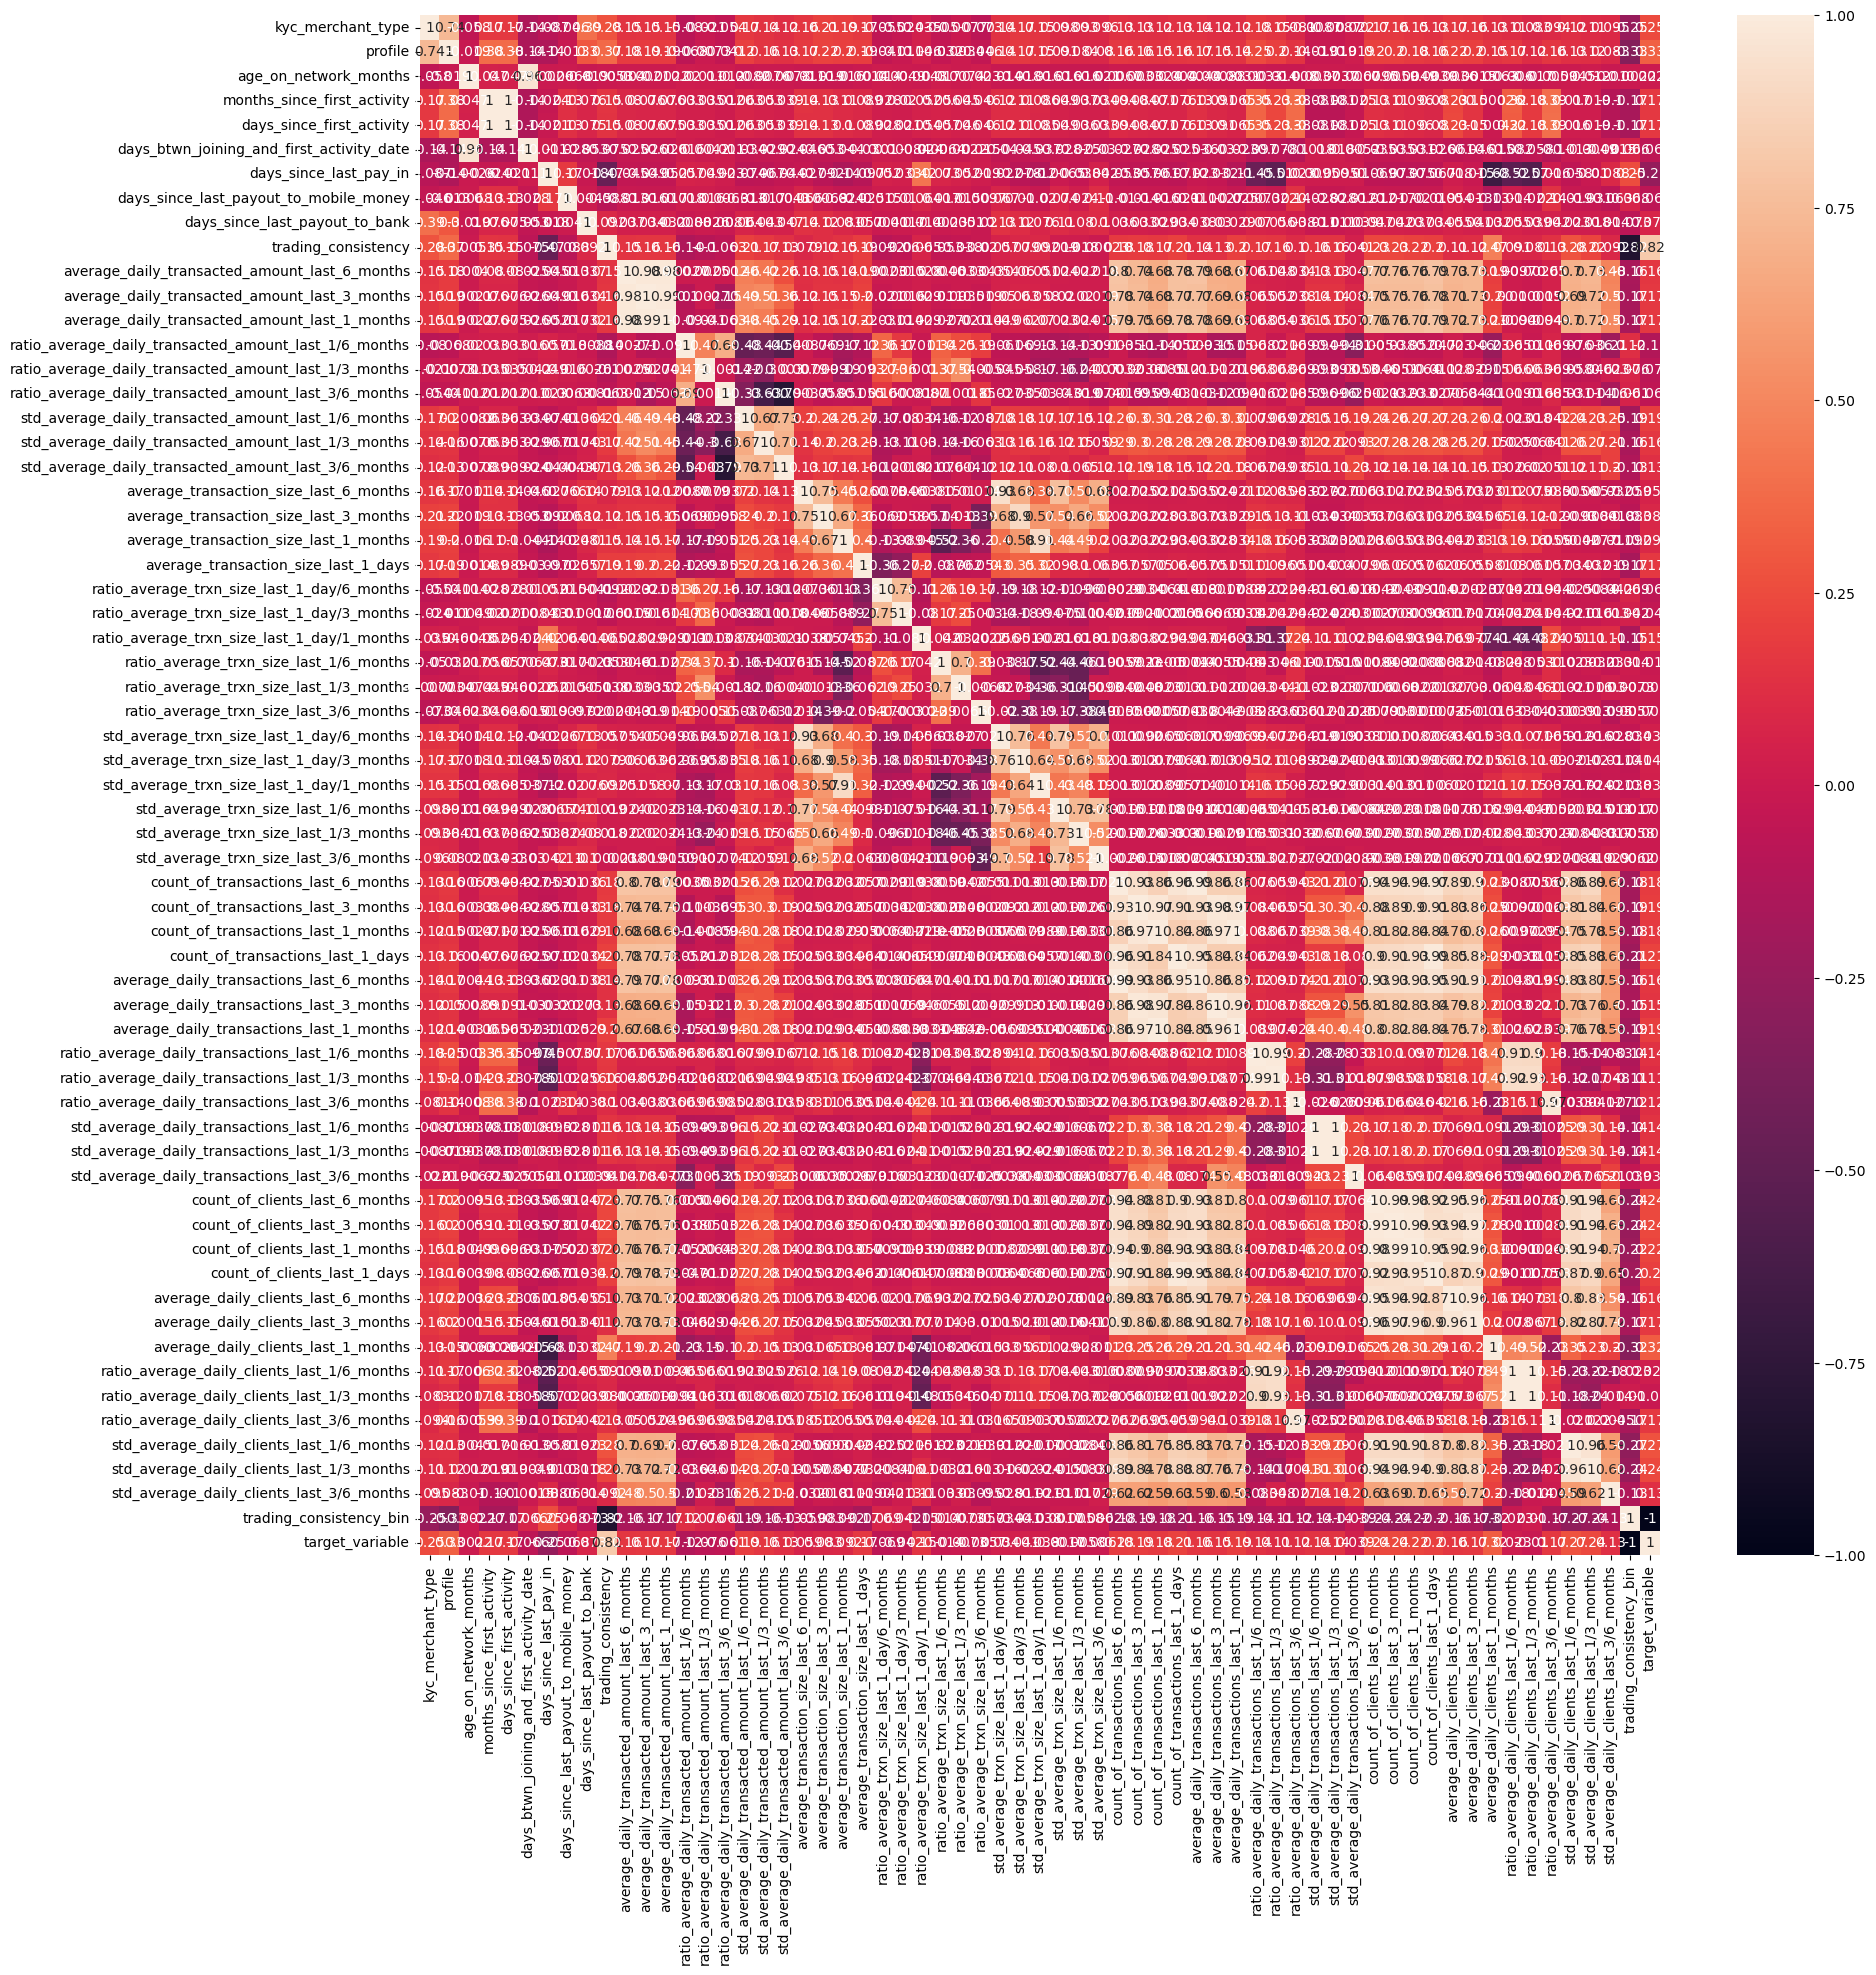

In [60]:
plt.figure(figsize = (20,20))


sns.heatmap(df_encoded_data.corr(), annot = True) #annot_kws = {'size' : 7}

In [17]:
X = df_encoded_data.iloc[:, :-1] 
y = df_encoded_data.iloc[:, -1] 

y.head(2)

0    1
1    1
Name: target_variable, dtype: int64

In [30]:
!pip install optbinning

In [31]:
from optbinning import OptimalBinning
from optbinning import BinningProcess

ModuleNotFoundError: No module named 'optbinning'

In [18]:
variable_names = X.columns.tolist()  # List of variable names
special_values = [-4]  # List of special values in your data

binning_results = {}

for var in variable_names:
    # Exclude special values from binning process
    variable_data = X[var].loc[~X[var].isin(special_values)]
    
    
    bins, labels = pd.cut(variable_data, bins=10, labels=False, retbins=True)
    
    # Create a separate bin for the special values
    bins_with_special = pd.cut(X[var], bins=labels, labels=False)
    bins_with_special[X[var].isin(special_values)] = len(labels)
    
    # Store the binning results for each variable
    binning_results[var] = bins_with_special

In [19]:
# Convert the binning results to a new DataFrame
binning_results_df = pd.DataFrame(binning_results)

binning_results_df.head()

kyc_merchant_type  profile  age_on_network_months  \
0                  9        4                   1.00   
1                  9        4                   1.00   
2                  9        4                   0.00   
3                  9        9                   1.00   
4                  9        4                   5.00   

   months_since_first_activity  days_since_first_activity  \
0                            2                          2   
1                            3                          3   
2                            1                          1   
3                            2                          2   
4                            9                          9   

   days_btwn_joining_and_first_activity_date  days_since_last_pay_in  \
0                                          2                       0   
1                                          2                       0   
2                                          2                       0   
3                                          2                       0   
4                                          3                       0   

   days_since_last_payout_to_mobile_money  days_since_last_payout_to_bank  \
0                                   11.00                            0.00   
1                                   11.00                            0.00   
2                                   11.00                            0.00   
3                                   11.00                            0.00   
4                                   11.00                            0.00   

   trading_consistency  average_daily_transacted_amount_last_6_months  \
0                    9                                              0   
1                    8                                              0   
2                    6                                              0   
3                    7                                              0   
4                    9                                              0   

   average_daily_transacted_amount_last_3_months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   average_daily_transacted_amount_last_1_months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   ratio_average_daily_transacted_amount_last_1/6_months  \
0                                               1.00       
1                                               1.00       
2                                               1.00       
3                                               2.00       
4                                               1.00       

   ratio_average_daily_transacted_amount_last_1/3_months  \
0                                               3.00       
1                                               3.00       
2                                               1.00       
3                                               3.00       
4                                               3.00       

   ratio_average_daily_transacted_amount_last_3/6_months  \
0                                               5.00       
1                                               5.00       
2                                               6.00       
3                                               5.00       
4                                               5.00       

   std_average_daily_transacted_amount_last_1/6_months  \
0                                                  0     
1                                                  0     
2                                                  0     
3                      

In [20]:
binning_results_df.shape

(104001, 53)

In [21]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(binning_results_df, y, test_size = 0.3, random_state = 42)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
y_train.value_counts()

0    68703
1     4097
Name: target_variable, dtype: int64

In [23]:
# Balance class distribution using SMOTE

smote = SMOTE(sampling_strategy = 'minority', random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [24]:
y_resampled.value_counts()

0    68703
1    68703
Name: target_variable, dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Instantiate a Random Forest classifier
# rf = RandomForestClassifier(class_weight=class_weights)
# 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100


rf = RandomForestClassifier(class_weight = 'balanced', n_estimators = 500, max_depth = 100, min_samples_split = 2, min_samples_leaf = 1, random_state = 42)

rf.fit(X_train_scaled, y_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=100, n_estimators=500,
                       random_state=42)

In [26]:
# cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

# # Perform cross-validation on the training set
# cv_scores = cross_val_score(rf, X_resampled, y_resampled, cv = cv, scoring = 'accuracy')

# # Print the accuracy scores for each fold
# for fold_idx, score in enumerate(cv_scores):
#     print(f"Fold {fold_idx+1}: Accuracy = {score}")

# # Calculate the average accuracy across all folds
# average_accuracy = cv_scores.mean()
# print("Average Accuracy:", average_accuracy)

Fold 1: Accuracy = 1.0
Fold 2: Accuracy = 1.0
Fold 3: Accuracy = 1.0
Fold 4: Accuracy = 1.0
Fold 5: Accuracy = 1.0
Average Accuracy: 1.0


In [29]:
# importances = rf.feature_importances_

# # Create a pandas DataFrame to store the importances and feature names
# feature_importances = pd.DataFrame({'feature': list(X_resampled.columns), 'importance': importances})

# # Sort the features by importance in descending order
# feature_importances = feature_importances.sort_values('importance', ascending = False)

# # Create a bar chart of the feature importances
# plt.figure(figsize = (20,20))

# plt.bar(feature_importances['feature'], feature_importances['importance'])
# plt.xticks(rotation = 90)
# plt.xlabel('Feature')
# plt.ylabel('Importance')
# # plt.title('Random Forest Feature Importances')
# plt.show()

AttributeError: ignored

In [42]:
# Make predictions on the test data
y_pred_rf = rf.predict(X_test_scaled)

y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

In [43]:
# # Print the classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29430
           1       1.00      1.00      1.00      1771

    accuracy                           1.00     31201
   macro avg       1.00      1.00      1.00     31201
weighted avg       1.00      1.00      1.00     31201



In [44]:
# Compute the false positive rate, true positive rate, and threshold for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)

In [45]:
# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

In [46]:
roc_auc = roc_auc_score(y_test, y_pred_rf)
roc_auc

1.0

In [47]:
import matplotlib.pyplot as plt

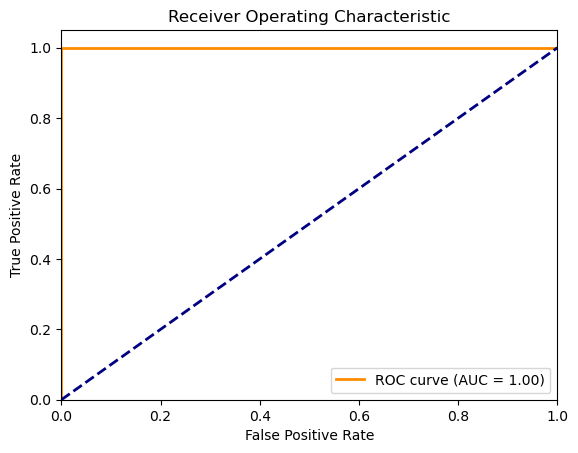

In [48]:
# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [49]:
# Get the Gini score of the model
gini_score = sum(rf.feature_importances_ * (1 - rf.feature_importances_))
print("Gini score:", gini_score)

Gini score: 0.7934095345338625


## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr_model = LogisticRegression(penalty = 'l1', C = 1.0, solver = 'liblinear')

# Fit the model on the scaled training data
lr_model.fit(X_train_scaled, y_resampled)

LogisticRegression(penalty='l1', solver='liblinear')

In [52]:
# Predict the target variable for the test data
y_pred = lr_model.predict(X_test_scaled)

y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29430
           1       1.00      1.00      1.00      1771

    accuracy                           1.00     31201
   macro avg       1.00      1.00      1.00     31201
weighted avg       1.00      1.00      1.00     31201



In [53]:
# Compute the false positive rate, true positive rate, and threshold for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [54]:
# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

In [55]:
roc_auc = roc_auc_score(y_test, y_pred)
roc_auc

1.0

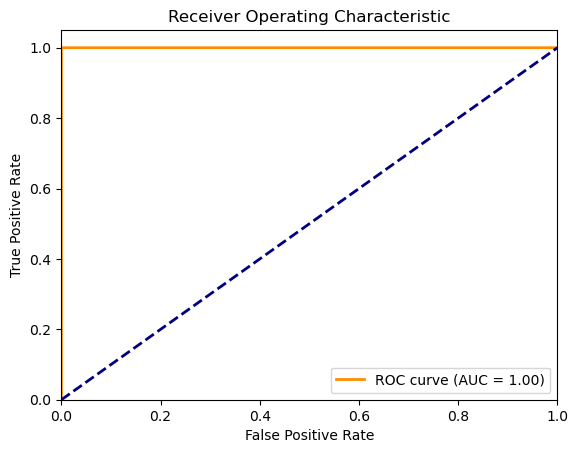

In [56]:
# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [114]:
lr_model.coef_

array([[ 2.16299104e-02,  8.78919212e-02,  1.24936706e+00,
         1.08094119e+00,  1.08740793e-01,  0.00000000e+00,
         0.00000000e+00, -1.16507732e-01, -2.44404090e-01,
        -1.34528051e-01, -3.98970025e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  3.81365207e-01,
         1.30180800e-01, -3.32579282e-01,  4.04855245e-02,
        -6.79400369e-01,  4.13428150e-02, -4.79020864e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -4.42217282e-04, -1.49935857e-01,
         0.00000000e+00, -6.79068455e-02, -3.67139603e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         5.59835928e-02,  1.10395166e-01, -4.21328342e-01,
         0.00000000e+00,  1.58105268e-01,  0.00000000e+00,
        -4.19849868e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

#### Feature selection

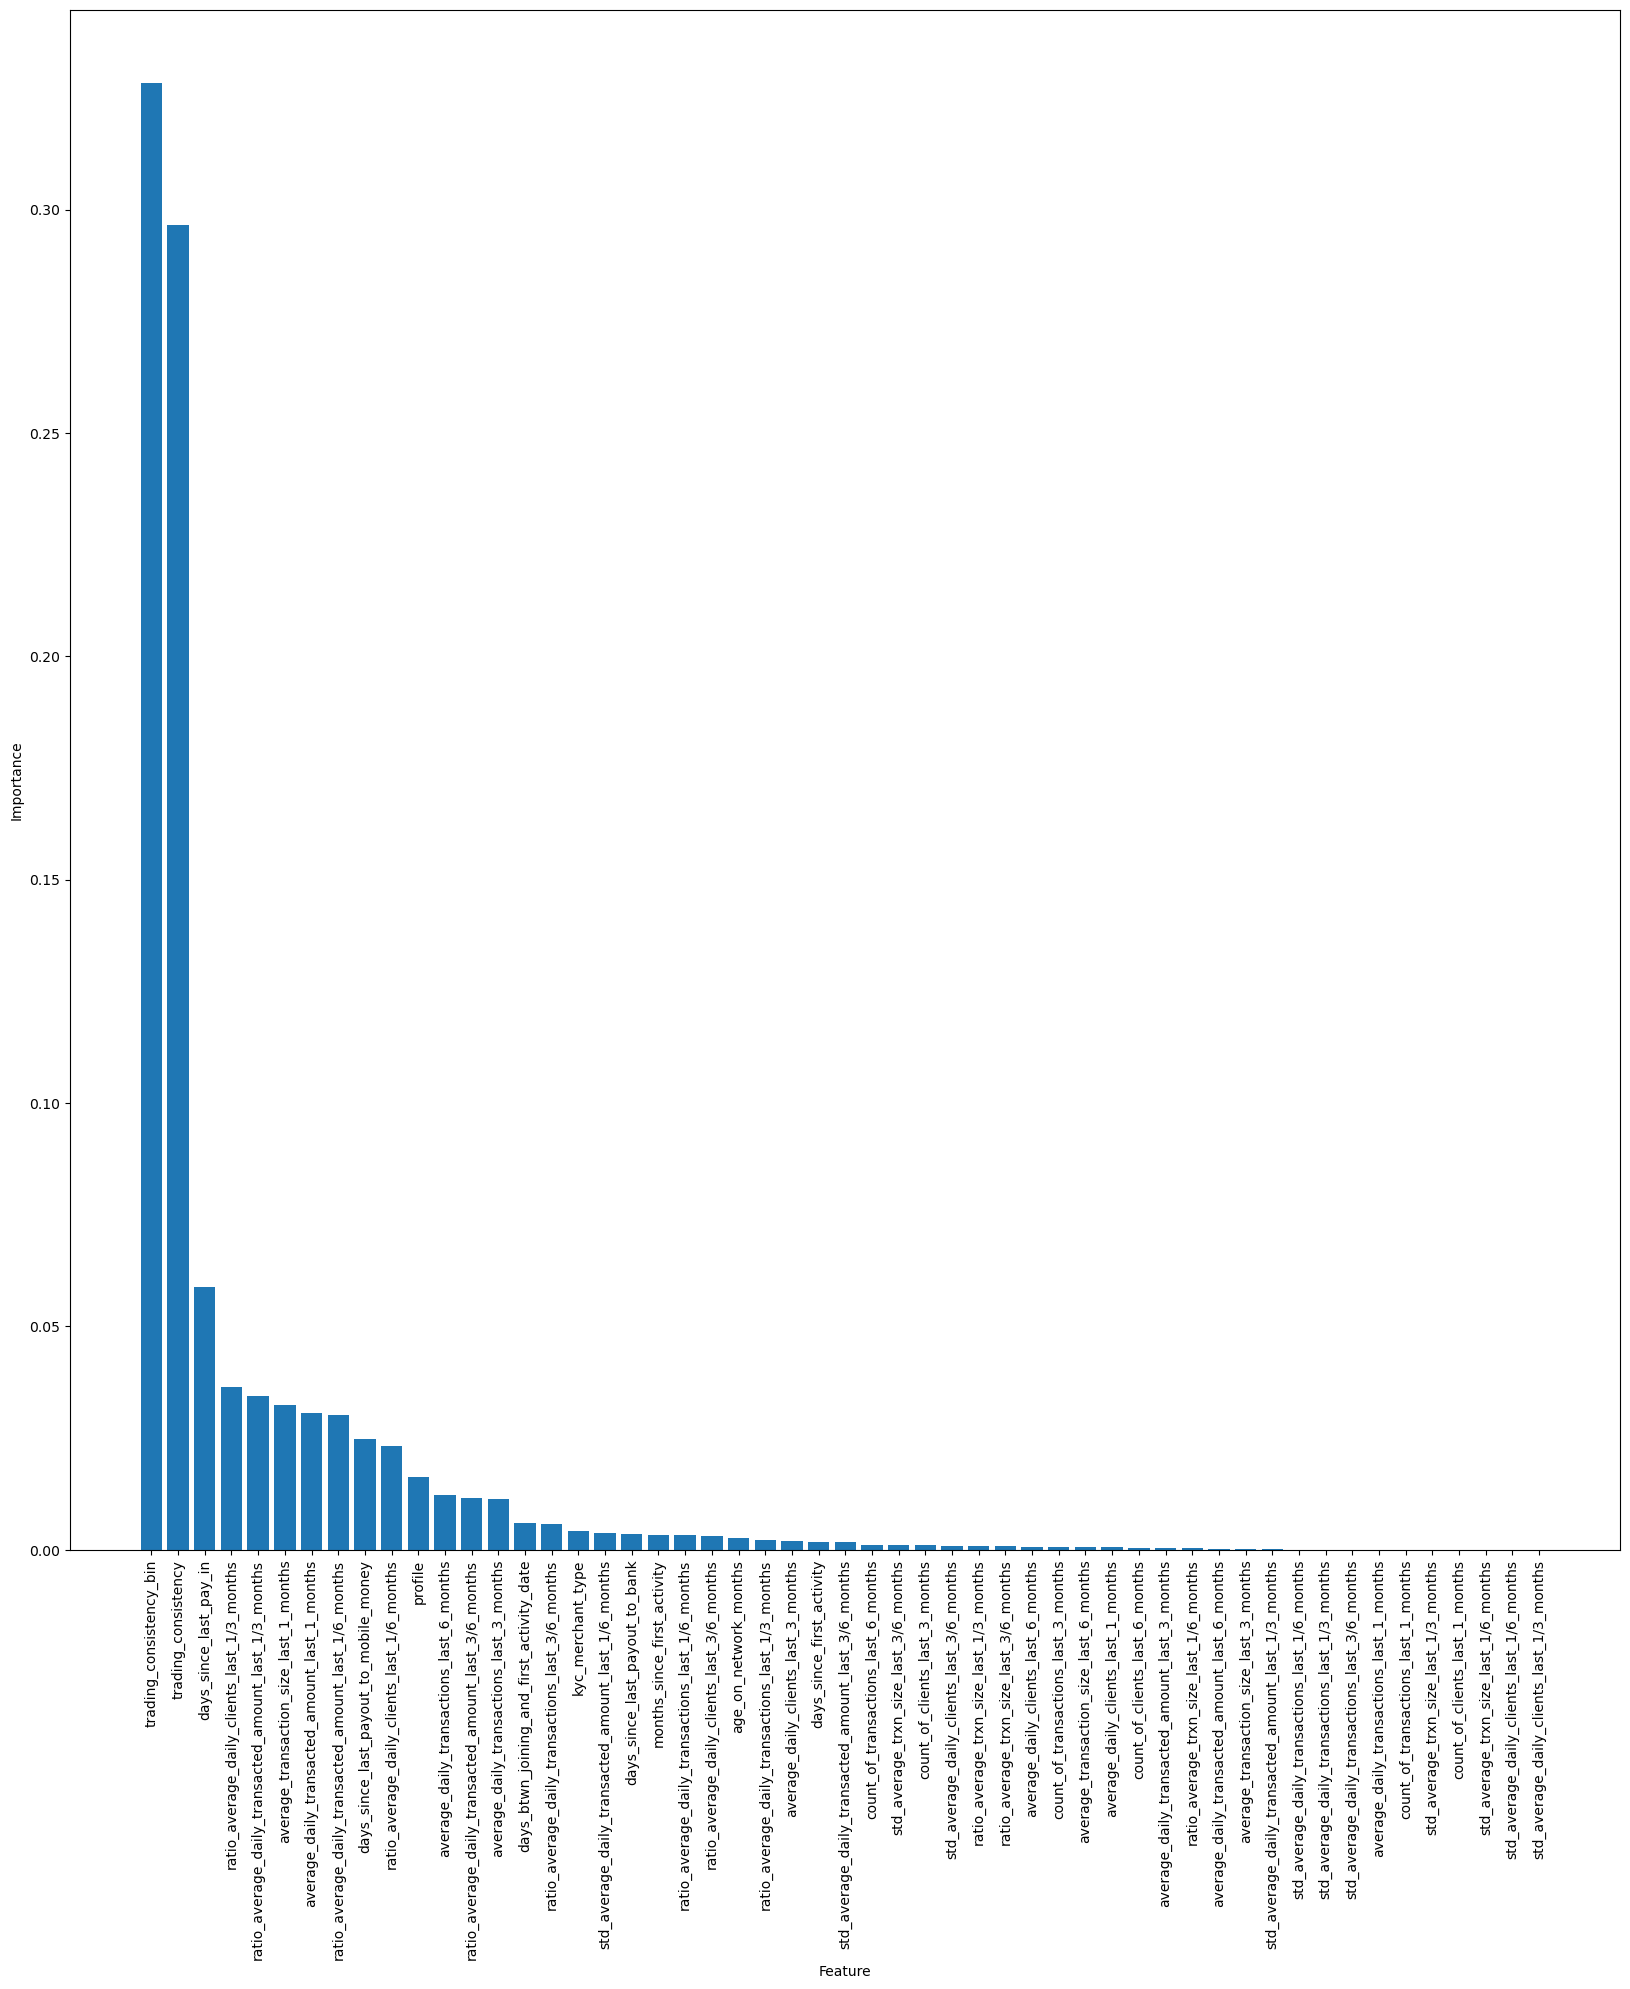

In [57]:
importances = rf.feature_importances_

# Create a pandas DataFrame to store the importances and feature names
feature_importances = pd.DataFrame({'feature': list(X_resampled.columns), 'importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending = False)

# Create a bar chart of the feature importances
plt.figure(figsize = (20,20))

plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
# plt.title('Random Forest Feature Importances')
plt.show()

In [58]:
importances = rf.feature_importances_

# Create a pandas DataFrame to store the importances and feature names
feature_importances = pd.DataFrame({'feature': list(X_resampled.columns), 'importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending = False).reset_index(drop = True)

feature_importances

feature  importance
0                             trading_consistency_bin        0.33
1                                 trading_consistency        0.30
2                              days_since_last_pay_in        0.06
3         ratio_average_daily_clients_last_1/3_months        0.04
4   ratio_average_daily_transacted_amount_last_1/3...        0.03
5              average_transaction_size_last_1_months        0.03
6       average_daily_transacted_amount_last_1_months        0.03
7   ratio_average_daily_transacted_amount_last_1/6...        0.03
8              days_since_last_payout_to_mobile_money        0.02
9         ratio_average_daily_clients_last_1/6_months        0.02
10                                            profile        0.02
11           average_daily_transactions_last_6_months        0.01
12  ratio_average_daily_transacted_amount_last_3/6...        0.01
13           average_daily_transactions_last_3_months        0.01
14          days_btwn_joining_and_first_activity_date        0.01
15   ratio_average_daily_transactions_last_3/6_months        0.01
16                                  kyc_merchant_type        0.00
17  std_average_daily_transacted_amount_last_1/6_m...        0.00
18                     days_since_last_payout_to_bank        0.00
19                        months_since_first_activity        0.00
20   ratio_average_daily_transactions_last_1/6_months        0.00
21        ratio_average_daily_clients_last_3/6_months        0.00
22                              age_on_network_months        0.00
23   ratio_average_daily_transactions_last_1/3_months        0.00
24                average_daily_clients_last_3_months        0.00
25                          days_since_first_activity        0.00
26  std_average_daily_transacted_amount_last_3/6_m...        0.00
27                count_of_transactions_last_6_months        0.00
28              std_average_trxn_size_last_3/6_months        0.00
29                     count_of_clients_last_3_months        0.00
30          std_average_daily_clients_last_3/6_months        0.00
31            ratio_average_trxn_size_last_1/3_months        0.00
32            ratio_average_trxn_size_last_3/6_months        0.00
33                average_daily_clients_last_6_months        0.00
34                count_of_transactions_last_3_months        0.00
35             average_transaction_size_last_6_months        0.00
36                average_daily_clients_last_1_months        0.00
37                     count_of_clients_last_6_months        0.00
38      average_daily_transacted_amount_last_3_months        0.00
39            ratio_average_trxn_size_last_1/6_months        0.00
40      average_daily_transacted_amount_last_6_months        0.00
41             average_transaction_size_last_3_months        0.00
42  std_average_daily_transacted_amount_last_1/3_m...        0.00
43     std_average_daily_transactions_last_1/6_months        0.00
44     std_average_daily_transactions_last_1/3_months        0.00
45     std_average_daily_transactions_last_3/6_months        0.00
46           average_daily_transactions_last_1_months        0.00
47                count_of_transactions_last_1_months        0.00
48              std_average_trxn_size_last_1/3_months        0.00
49                     count_of_clients_last_1_months        0.00
50              std_average_trxn_size_last_1/6_months        0.00
51          std_average_daily_clients_last_1/6_months        0.00
52          std_average_daily_clients_last_1/3_months        0.00

In [59]:
from sklearn.feature_selection import RFE


rfe = RFE(estimator = lr_model, n_features_to_select = 30)  # Specify the desired number of features to select

rfe.fit(X_train_scaled, y_resampled)

RFE(estimator=LogisticRegression(penalty='l1', solver='liblinear'),
    n_features_to_select=30)

In [60]:
# Get the selected features
selected_features = X_resampled.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['trading_consistency', 'average_daily_transacted_amount_last_6_months',
       'average_daily_transacted_amount_last_3_months',
       'average_daily_transacted_amount_last_1_months',
       'ratio_average_daily_transacted_amount_last_1/6_months',
       'ratio_average_daily_transacted_amount_last_1/3_months',
       'ratio_average_daily_transacted_amount_last_3/6_months',
       'std_average_daily_transacted_amount_last_1/6_months',
       'std_average_daily_transacted_amount_last_1/3_months',
       'std_average_daily_transacted_amount_last_3/6_months',
       'average_transaction_size_last_6_months',
       'average_transaction_size_last_3_months',
       'average_transaction_size_last_1_months',
       'ratio_average_trxn_size_last_1/6_months',
       'ratio_average_trxn_size_last_3/6_months',
       'std_average_daily_transactions_last_1/3_months',
       'std_average_daily_transactions_last_3/6_months',
       'count_of_clients_last_6_months', 'count_of_

In [119]:
df_encoded_data.head(2)

kyc_merchant_type   profile  daily_trading_consistency_last_6_months  \
0           0.297458  0.259380                                     0.92   
1           0.297458  0.257679                                     0.88   

   daily_trading_consistency_last_3_months  \
0                                     0.96   
1                                     0.93   

   daily_trading_consistency_last_1_months  age_on_network_months  \
0                                     0.97                   12.0   
1                                     0.90                   17.0   

   months_since_first_activity  months_btwn_joining_and_first_activity_date  \
0                         12.0                                          0.0   
1                         16.0                                          0.0   

   days_since_last_pay_in  days_since_last_payout_to_mobile_money  \
0                     0.0                                    -4.0   
1                     0.0                                    -4.0   

   days_since_last_payout_to_bank  average_transaction_size_last_6_months  \
0                             0.0                            37978.853755   
1                             0.0                           112329.803456   

   average_transaction_size_last_3_months  \
0                            36007.220217   
1                           115268.379447   

   average_transaction_size_last_1_months  \
0                            31761.224490   
1                            96504.891304   

   average_transaction_size_last_1_day  \
0                         37333.333333   
1                         53625.000000   

   ratio_payment_amount_last_1_day/6_months  \
0                                      0.01   
1                                      0.00   

   ratio_payment_amount_last_1_day/3_months  \
0                                      0.01   
1                                      0.01   

   ratio_payment_amount_last_1_day/1_months  \
0                                      0.04   
1                                      0.02   

   ratio_payment_amount_last_1/6_months  ratio_payment_amount_last_1/3_months  \
0                                  0.16                                  0.31   
1                                  0.17                                  0.30   

   ratio_payment_amount_last_3/6_months  \
0                                  0.52   
1                                  0.56   

   std_payment_amount_last_1_day/6_months  \
0                               9552650.0   
1                              25897099.5   

   std_payment_amount_last_1_day/3_months  \
0                               4931000.0   
1                              14474200.0   

   std_payment_amount_last_1_day/1_months  std_payment_amount_last_1/6_months  \
0                               1500300.0                           8052350.0   
1                               4331975.0                          21565124.5   

   std_payment_amount_last_1/3_months  std_payment_amount_last_3/6_months  \
0                           3430700.0                           4621650.0   
1                          10142225.0                          11422899.5   

   ratio_payment_count_last_1_day/6_months  \
0                                     0.01   
1                                     0.01   

   ratio_payment_count_last_1_day/3_months  \
0                                     0.01   
1                                     0.02   

   ratio_payment_count_last_1_day/1_months  \
0                                     0.03   
1                                     0.04   

   ratio_payment_count_last_1/6_months  ratio_payment_count_last_1/3_months  \
0                                 0.19                                 0.35   
1                                 0.20                                 0.36   

   ratio_payment_count_last_3/6_months  std_payment_count_last_1_day/6_months  \
0                                 0.55                               

In [126]:
len(y_pred_proba)

31308

In [68]:
X_new = df_encoded_data.iloc[:, :-1]

In [69]:
preds = lr_model.predict_proba(X_new)[:, 1]

/apps/conda/fiona.kamau/envs/tanda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [70]:
preds.shape

(104360,)

In [71]:
df_encoded_data.head(2)

kyc_merchant_type   profile  daily_trading_consistency_last_6_months  \
0           0.297458  0.259380                                     0.92   
1           0.297458  0.257679                                     0.88   

   daily_trading_consistency_last_3_months  \
0                                     0.96   
1                                     0.93   

   daily_trading_consistency_last_1_months  age_on_network_months  \
0                                     0.97                   12.0   
1                                     0.90                   17.0   

   months_since_first_activity  months_btwn_joining_and_first_activity_date  \
0                         12.0                                          0.0   
1                         16.0                                          0.0   

   days_since_last_pay_in  days_since_last_payout_to_mobile_money  \
0                     0.0                                    -4.0   
1                     0.0                                    -4.0   

   days_since_last_payout_to_bank  average_transaction_size_last_6_months  \
0                             0.0                            37978.853755   
1                             0.0                           112329.803456   

   average_transaction_size_last_3_months  \
0                            36007.220217   
1                           115268.379447   

   average_transaction_size_last_1_months  \
0                            31761.224490   
1                            96504.891304   

   average_transaction_size_last_1_day  \
0                         37333.333333   
1                         53625.000000   

   ratio_payment_amount_last_1_day/6_months  \
0                                      0.01   
1                                      0.00   

   ratio_payment_amount_last_1_day/3_months  \
0                                      0.01   
1                                      0.01   

   ratio_payment_amount_last_1_day/1_months  \
0                                      0.04   
1                                      0.02   

   ratio_payment_amount_last_1/6_months  ratio_payment_amount_last_1/3_months  \
0                                  0.16                                  0.31   
1                                  0.17                                  0.30   

   ratio_payment_amount_last_3/6_months  \
0                                  0.52   
1                                  0.56   

   std_payment_amount_last_1_day/6_months  \
0                               9552650.0   
1                              25897099.5   

   std_payment_amount_last_1_day/3_months  \
0                               4931000.0   
1                              14474200.0   

   std_payment_amount_last_1_day/1_months  std_payment_amount_last_1/6_months  \
0                               1500300.0                           8052350.0   
1                               4331975.0                          21565124.5   

   std_payment_amount_last_1/3_months  std_payment_amount_last_3/6_months  \
0                           3430700.0                           4621650.0   
1                          10142225.0                          11422899.5   

   ratio_payment_count_last_1_day/6_months  \
0                                     0.01   
1                                     0.01   

   ratio_payment_count_last_1_day/3_months  \
0                                     0.01   
1                                     0.02   

   ratio_payment_count_last_1_day/1_months  \
0                                     0.03   
1                                     0.04   

   ratio_payment_count_last_1/6_months  ratio_payment_count_last_1/3_months  \
0                                 0.19                                 0.35   
1                                 0.20                                 0.36   

   ratio_payment_count_last_3/6_months  std_payment_count_last_1_day/6_months  \
0                                 0.55                               

In [72]:
df_encoded_data['probability'] = preds

df_encoded_data.head(2)

kyc_merchant_type   profile  daily_trading_consistency_last_6_months  \
0           0.297458  0.259380                                     0.92   
1           0.297458  0.257679                                     0.88   

   daily_trading_consistency_last_3_months  \
0                                     0.96   
1                                     0.93   

   daily_trading_consistency_last_1_months  age_on_network_months  \
0                                     0.97                   12.0   
1                                     0.90                   17.0   

   months_since_first_activity  months_btwn_joining_and_first_activity_date  \
0                         12.0                                          0.0   
1                         16.0                                          0.0   

   days_since_last_pay_in  days_since_last_payout_to_mobile_money  \
0                     0.0                                    -4.0   
1                     0.0                                    -4.0   

   days_since_last_payout_to_bank  average_transaction_size_last_6_months  \
0                             0.0                            37978.853755   
1                             0.0                           112329.803456   

   average_transaction_size_last_3_months  \
0                            36007.220217   
1                           115268.379447   

   average_transaction_size_last_1_months  \
0                            31761.224490   
1                            96504.891304   

   average_transaction_size_last_1_day  \
0                         37333.333333   
1                         53625.000000   

   ratio_payment_amount_last_1_day/6_months  \
0                                      0.01   
1                                      0.00   

   ratio_payment_amount_last_1_day/3_months  \
0                                      0.01   
1                                      0.01   

   ratio_payment_amount_last_1_day/1_months  \
0                                      0.04   
1                                      0.02   

   ratio_payment_amount_last_1/6_months  ratio_payment_amount_last_1/3_months  \
0                                  0.16                                  0.31   
1                                  0.17                                  0.30   

   ratio_payment_amount_last_3/6_months  \
0                                  0.52   
1                                  0.56   

   std_payment_amount_last_1_day/6_months  \
0                               9552650.0   
1                              25897099.5   

   std_payment_amount_last_1_day/3_months  \
0                               4931000.0   
1                              14474200.0   

   std_payment_amount_last_1_day/1_months  std_payment_amount_last_1/6_months  \
0                               1500300.0                           8052350.0   
1                               4331975.0                          21565124.5   

   std_payment_amount_last_1/3_months  std_payment_amount_last_3/6_months  \
0                           3430700.0                           4621650.0   
1                          10142225.0                          11422899.5   

   ratio_payment_count_last_1_day/6_months  \
0                                     0.01   
1                                     0.01   

   ratio_payment_count_last_1_day/3_months  \
0                                     0.01   
1                                     0.02   

   ratio_payment_count_last_1_day/1_months  \
0                                     0.03   
1                                     0.04   

   ratio_payment_count_last_1/6_months  ratio_payment_count_last_1/3_months  \
0                                 0.19                                 0.35   
1                                 0.20                                 0.36   

   ratio_payment_count_last_3/6_months  std_payment_count_last_1_day/6_months  \
0                                 0.55                               

In [73]:
df_encoded_data['probability'] = round(df_encoded_data['probability'],2)

In [74]:
df_encoded_data['probability'].value_counts()

0.00    95940
1.00     7569
0.01      171
0.99       59
0.02       56
        ...  
0.78        1
0.65        1
0.68        1
0.69        1
0.29        1
Name: probability, Length: 98, dtype: int64

### Heuristic Model

In [69]:
df_encoded_data.shape

(104851, 71)

In [68]:
df_encoded_data.head(2)

kyc_merchant_code  kyc_merchant_type   profile  \
0            635070           0.297458  0.259380   
1            616862           0.297458  0.257679   

   daily_trading_consistency_last_6_months  \
0                                     0.92   
1                                     0.88   

   daily_trading_consistency_last_3_months  \
0                                     0.96   
1                                     0.93   

   daily_trading_consistency_last_1_months  age_on_network_months  \
0                                     0.97                   12.0   
1                                     0.90                   17.0   

   months_since_first_activity  months_btwn_joining_and_first_activity_date  \
0                         12.0                                          0.0   
1                         16.0                                          0.0   

   days_since_last_pay_in  days_since_last_payout_to_mobile_money  \
0                     0.0                                    -4.0   
1                     0.0                                    -4.0   

   days_since_last_payout_to_bank  average_transaction_size_last_6_months  \
0                             0.0                            37978.853755   
1                             0.0                           112329.803456   

   average_transaction_size_last_3_months  \
0                            36007.220217   
1                           115268.379447   

   average_transaction_size_last_1_months  \
0                            31761.224490   
1                            96504.891304   

   average_transaction_size_last_1_day  \
0                         37333.333333   
1                         53625.000000   

   ratio_payment_amount_last_1_day/6_months  \
0                                      0.01   
1                                      0.00   

   ratio_payment_amount_last_1_day/3_months  \
0                                      0.01   
1                                      0.01   

   ratio_payment_amount_last_1_day/1_months  \
0                                      0.04   
1                                      0.02   

   ratio_payment_amount_last_1/6_months  ratio_payment_amount_last_1/3_months  \
0                                  0.16                                  0.31   
1                                  0.17                                  0.30   

   ratio_payment_amount_last_3/6_months  \
0                                  0.52   
1                                  0.56   

   std_payment_amount_last_1_day/6_months  \
0                               9552650.0   
1                              25897099.5   

   std_payment_amount_last_1_day/3_months  \
0                               4931000.0   
1                              14474200.0   

   std_payment_amount_last_1_day/1_months  std_payment_amount_last_1/6_months  \
0                               1500300.0                           8052350.0   
1                               4331975.0                          21565124.5   

   std_payment_amount_last_1/3_months  std_payment_amount_last_3/6_months  \
0                           3430700.0                           4621650.0   
1                          10142225.0                          11422899.5   

   ratio_payment_count_last_1_day/6_months  \
0                                     0.01   
1                                     0.01   

   ratio_payment_count_last_1_day/3_months  \
0                                     0.01   
1                                     0.02   

   ratio_payment_count_last_1_day/1_months  \
0                                     0.03   
1                                     0.04   

   ratio_payment_count_last_1/6_months  ratio_payment_count_last_1/3_months  \
0                                 0.19                                 0.35   
1                                 0.20                                 0.36   

   ratio_payment_count_last_3/6_months  std_payment_count_last_1_day/6_months  

#### Trading consistency

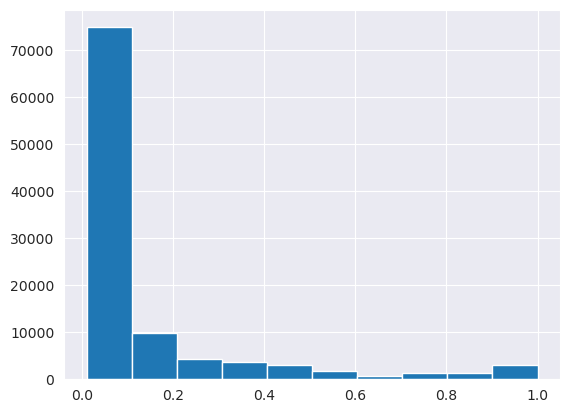

In [25]:
plt.hist(df_encoded_data['trading_consistency'], bins = 10)

plt.grid(True)

#plt.xlim(-.09,1)

plt.show()

In [31]:
df_encoded_data[df_encoded_data['trading_consistency'] >= 0][['trading_consistency']].describe().T

count  mean  std  min  25%  50%  75%  max
trading_consistency 104001.00  0.14 0.22 0.01 0.02 0.04 0.12 1.00

In [32]:
df_encoded_data[['trading_consistency']].describe().T

count  mean  std  min  25%  50%  75%  max
trading_consistency 104001.00  0.14 0.22 0.01 0.02 0.04 0.12 1.00

In [26]:
def trading_consistency_score(df):
    
    trading_consistency = df['trading_consistency']
    
    if trading_consistency < .30:
        return -50
    elif trading_consistency >= .30 and trading_consistency < .40:
        return -25
    elif trading_consistency >= .40 and trading_consistency < .50:
        return 0
    elif trading_consistency >= .50 and trading_consistency < .60:
        return 100
    elif trading_consistency >= .60 and trading_consistency < .70:
        return 125
    elif trading_consistency >= .70 and trading_consistency < .95:
        return 150
    elif trading_consistency >= .95:
        return 200

In [27]:
df_encoded_data['trading_consistency_score'] = df_encoded_data.apply(lambda x : trading_consistency_score(x), axis = 1)

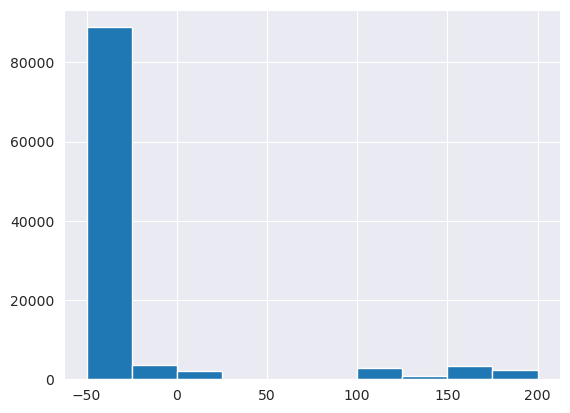

In [28]:
plt.hist(df_encoded_data['trading_consistency_score'], bins = 10)

plt.grid(True)

plt.show()

In [29]:
(df_encoded_data[df_encoded_data['trading_consistency'] >= .70].shape[0]/104001) * 100

5.64225343987077

In [30]:
mtn_data_derived_df.shape

(104851, 54)

## age on network vs months_since_first_activity

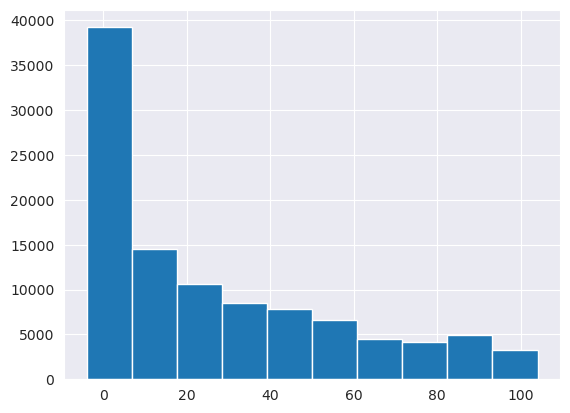

In [46]:
plt.hist(df_encoded_data['age_on_network_months'], bins = 10)

plt.grid(True)

#plt.xlim(0,10)

plt.show()

In [47]:
df_encoded_data[['age_on_network_months']].describe().T

count  mean   std   min   25%   50%   75%    max
age_on_network_months 104001.00 26.04 30.55 -4.00 -4.00 16.00 46.00 104.00

In [48]:
df_encoded_data[(df_encoded_data['age_on_network_months'] >= 0) & (df_encoded_data['age_on_network_months'] <= 6)].shape

(11703, 55)

In [50]:
(11703/104851 ) * 100

11.161553061010386

def age_on_network_score(df):
    
    age = df['age_on_network_months']
    
    if age < 3:
        return -50
    elif age >= 3 and age < 7:
        return 0
    elif age >= 7 and age < 9:
        return 50
    elif age >= 9 and age < 16:
        return 100
    elif age >= 16 and age < 24:
        return 150
    elif age >= 24:
        return 200

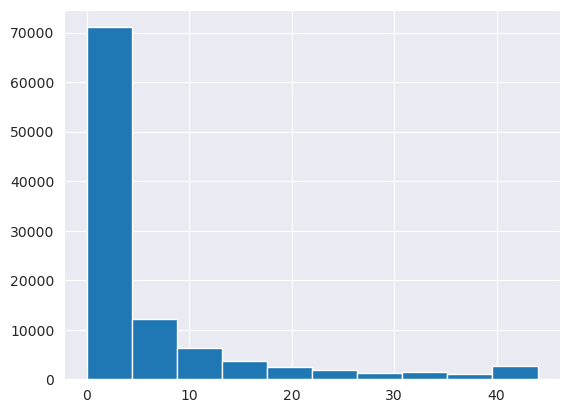

In [31]:
plt.hist(df_encoded_data['months_since_first_activity'], bins = 10)

plt.grid(True)

#plt.xlim(0,10)

plt.show()

In [32]:
df_encoded_data[['months_since_first_activity']].describe().T

count  mean  std  min  25%  50%  75%   max
months_since_first_activity 104001.00  6.42 9.40 0.00 1.00 3.00 6.00 44.00

# defining a function to score for age on network

def age_on_network_score(df):
    age = df['months_since_first_activity']
    
    if age >= 0 and age <= 1 :
        return -100
    if age > 1 and age < 3:
        return 0
    elif age >= 3 and age < 4:
        return 50
    elif age >= 4 and age < 5:
        return 100
    elif age >= 5:
        return 200

In [28]:
# defining a function to score for age on network

def age_on_network_score(df):
    age = df['months_since_first_activity']
    
    if age >= 0 and age < 1 :
        return -100
    if age >= 1 and age < 3:
        return 0
    elif age >= 3 and age < 4:
        return 50
    elif age >= 4 and age < 5:
        return 100
    elif age >= 5:
        return 200

In [29]:
df_encoded_data['age_on_network_score'] = df_encoded_data.apply(lambda x : age_on_network_score(x), axis = 1)

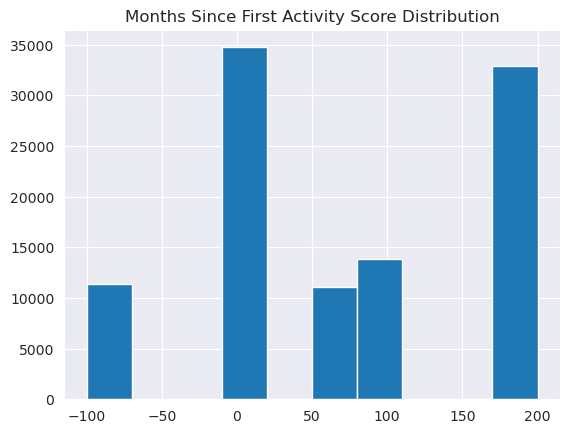

In [36]:
plt.hist(df_encoded_data['age_on_network_score'], bins = 10)

plt.title('Months Since First Activity Score Distribution')

plt.grid(True)

#plt.xlim(0,10)

plt.show()

## Days since last pay in

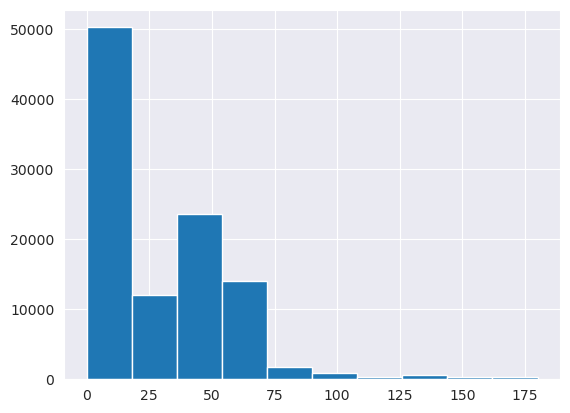

In [37]:
plt.hist(df_encoded_data['days_since_last_pay_in'], bins = 10)

plt.grid(True)

#plt.xlim(0,25)

plt.show()

In [38]:
df_encoded_data[['days_since_last_pay_in']].describe().T

count  mean   std  min  25%   50%   75%    max
days_since_last_pay_in 104001.00 28.64 27.40 0.00 6.00 20.00 43.00 180.00

In [30]:
def days_since_last_transaction_score(df):
    
    days_since = df['days_since_last_pay_in']
    
    if days_since <= 5:
        return 200
    elif days_since > 5 and days_since <= 7:
        return 150
    elif days_since > 7 and days_since <= 10:
        return 125
    elif days_since > 10 and days_since <= 15:
        return 100
    elif days_since > 15 and days_since <=20:
        return 50
    elif days_since > 20 and days_since <= 30:
        return 0
    elif days_since > 30:
        return -50

In [31]:
df_encoded_data['days_since_last_transaction_score'] = df_encoded_data.apply(lambda x : days_since_last_transaction_score(x), axis = 1)


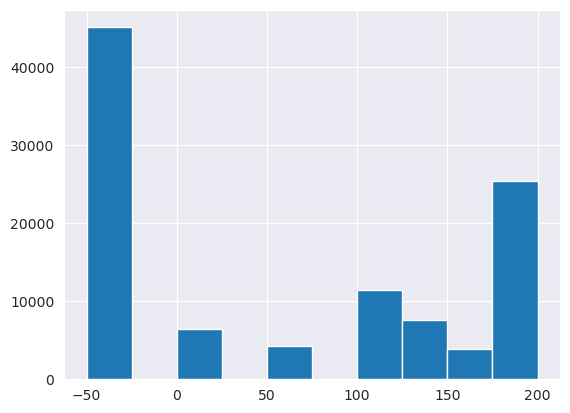

In [41]:
plt.hist(df_encoded_data['days_since_last_transaction_score'], bins = 10)

plt.grid(True)

plt.show()

## ratio payment amount / average monthly revenue / average daily revenue

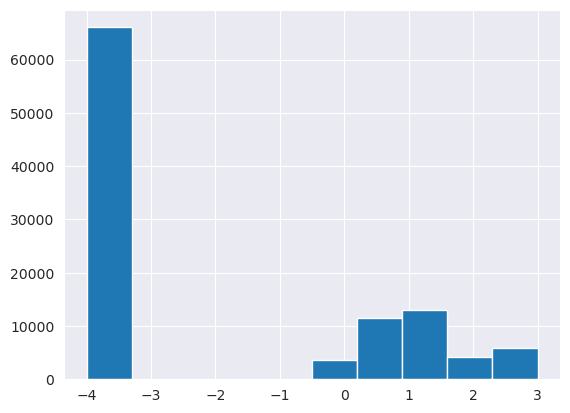

In [43]:
plt.hist(df_encoded_data['ratio_average_daily_transacted_amount_last_1/3_months'], bins = 10)

plt.grid(True)

#plt.xlim(0,4)

plt.show()

In [44]:
df_encoded_data[['ratio_average_daily_transacted_amount_last_1/3_months']].describe().T

count  mean  std   min  \
ratio_average_daily_transacted_amount_last_1/3_... 104001.00 -2.09 2.57 -4.00   

                                                     25%   50%  75%  max  
ratio_average_daily_transacted_amount_last_1/3_... -4.00 -4.00 0.77 3.00

def ratio_average_daily_transacted_amount_last_1_3_months(df):
    
    ratio = df['ratio_average_daily_transacted_amount_last_1/3_months']
    
    if ratio < .10:
        return -50
    elif ratio >= .10 and ratio < .30:
        return -25
    elif ratio >= .30 and ratio < .50:
        return 0
    elif ratio >= .50 and ratio < .60:
        return 100
    elif ratio >= .60 and ratio < .70:
        return 125
    elif ratio >= .70 and ratio < .85:
        return 150
    elif ratio >= .85 and ratio < 1.1:
        return 175
    elif ratio >= 1.1:
        return 200

In [32]:
def ratio_average_daily_transacted_amount_last_1_3_months(df):
    
    ratio = df['ratio_average_daily_transacted_amount_last_1/3_months']
    
    if ratio < .10:
        return -50
    elif ratio >= .10 and ratio < .30:
        return -25
    elif ratio >= .30 and ratio < .40:
        return 0
    elif ratio >= .40 and ratio < .50:
        return 50
    elif ratio >= .50 and ratio < .70:
        return 100
    elif ratio >= .70 and ratio < .80:
        return 125
    elif ratio >= .80 and ratio < .90:
        return 150
    elif ratio >= .90 and ratio < 1.1:
        return 175
    elif ratio >= 1.1:
        return 200

In [33]:
df_encoded_data['ratio_average_daily_transacted_amount_score'] = df_encoded_data.apply(lambda x : ratio_average_daily_transacted_amount_last_1_3_months(x), axis = 1)


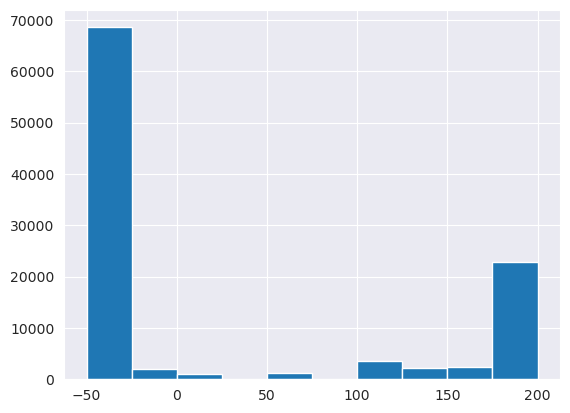

In [47]:
plt.hist(df_encoded_data['ratio_average_daily_transacted_amount_score'], bins = 10)

plt.grid(True)

plt.show()

## average transaction size

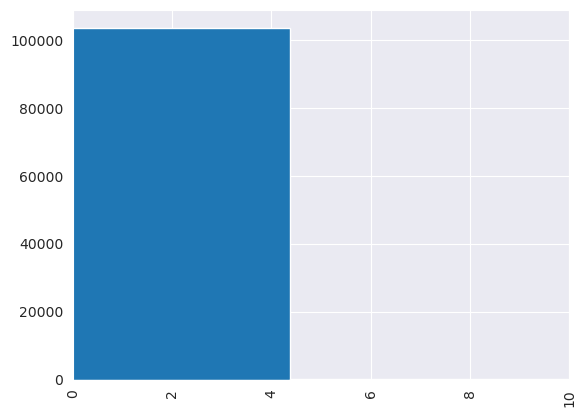

In [49]:
#plt.ticklabel_format(style = 'plain') 

plt.hist(df_encoded_data['ratio_average_trxn_size_last_1/3_months'], bins = 10)

plt.grid(True)

plt.xticks(rotation = 90)

plt.xlim(0,10)

plt.show()

In [50]:
df_encoded_data[['ratio_average_trxn_size_last_1/3_months']].describe().T

count  mean  std   min   25%  50%  \
ratio_average_trxn_size_last_1/3_months 104001.00 -0.42 1.97 -4.00 -0.44 0.00   

                                         75%   max  
ratio_average_trxn_size_last_1/3_months 0.96 79.78

def ratio_average_transaction_size_last_1_3_months(df):
    
    ratio = df['ratio_average_trxn_size_last_1/3_months']
    
    if ratio < .30:
        return -50
    elif ratio >= .30 and ratio < .40:
        return -25
    elif ratio >= .40 and ratio < .50:
        return 0
    elif ratio >= .50 and ratio < .65:
        return 100
    elif ratio >= .65 and ratio < .75:
        return 125
    elif ratio >= .75 and ratio < .85:
        return 150
    elif ratio >= .85 and ratio < .95:
        return 175
    elif ratio >= .95:
        return 200

In [34]:
def ratio_average_transaction_size_last_1_3_months(df):
    
    ratio = df['ratio_average_trxn_size_last_1/3_months']
    
    if ratio < .10:
        return -50
    elif ratio >= .10 and ratio < .30:
        return -25
    elif ratio >= .30 and ratio < .40:
        return 0
    elif ratio >= .40 and ratio < .50:
        return 50
    elif ratio >= .50 and ratio < .70:
        return 100
    elif ratio >= .70 and ratio < .80:
        return 125
    elif ratio >= .80 and ratio < .90:
        return 150
    elif ratio >= .90 and ratio < 1.1:
        return 175
    elif ratio >= 1.1:
        return 200

In [35]:
df_encoded_data['ratio_average_trxn_size_score'] = df_encoded_data.apply(lambda x : ratio_average_transaction_size_last_1_3_months(x), axis = 1)

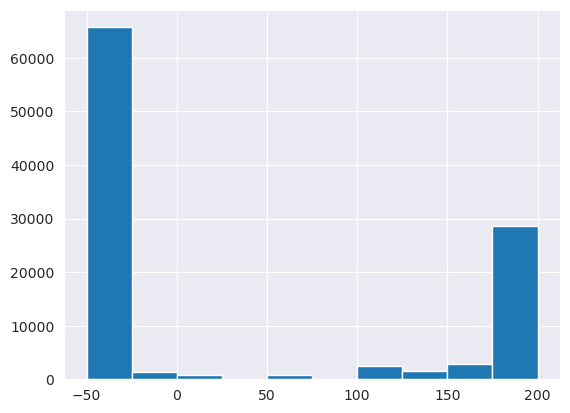

In [53]:
plt.hist(df_encoded_data['ratio_average_trxn_size_score'], bins = 10)

plt.grid(True)

plt.show()

#### Combine scores

In [54]:
# df_encoded_data['trading_consistency_score'] = df_encoded_data.apply(lambda x : trading_consistency_last_3_months_score(x), axis = 1)

# df_encoded_data['ratio_average_monthly_revenue_score'] = df_encoded_data.apply(lambda x : ratio_average_monthly_revenue_last_1_3_months(x), axis = 1)

# df_encoded_data['age_on_network_score'] = df_encoded_data.apply(lambda x : age_on_network_score(x), axis = 1)

# df_encoded_data['ratio_average_trxn_size'] = df_encoded_data.apply(lambda x : ratio_average_transaction_size_last_1_3_months(x), axis = 1)

# df_encoded_data['days_since_last_transaction_score'] = df_encoded_data.apply(lambda x : days_since_last_transaction_score(x), axis = 1)

df_encoded_data.head(2)

kyc_merchant_type  profile  age_on_network_months  \
0               0.36     0.33                  12.00   
1               0.36     0.30                  17.00   

   months_since_first_activity  days_since_first_activity  \
0                        11.00                     323.00   
1                        15.00                     471.00   

   days_btwn_joining_and_first_activity_date  days_since_last_pay_in  \
0                                      11.00                    0.00   
1                                       6.00                    0.00   

   days_since_last_payout_to_mobile_money  days_since_last_payout_to_bank  \
0                                   -4.00                            0.00   
1                                   -4.00                            0.00   

   trading_consistency  average_daily_transacted_amount_last_6_months  \
0                 0.92                                      106762.78   
1                 0.88                                      288937.22   

   average_daily_transacted_amount_last_3_months  \
0                                      110822.22   
1                                      324032.22   

   average_daily_transacted_amount_last_1_months  \
0                                      103753.33   
1                                      295948.33   

   ratio_average_daily_transacted_amount_last_1/6_months  \
0                                               0.97       
1                                               1.02       

   ratio_average_daily_transacted_amount_last_1/3_months  \
0                                               0.94       
1                                               0.91       

   ratio_average_daily_transacted_amount_last_3/6_months  \
0                                               1.04       
1                                               1.12       

   std_average_daily_transacted_amount_last_1/6_months  \
0                                            1504.72     
1                                            3505.56     

   std_average_daily_transacted_amount_last_1/3_months  \
0                                            3534.44     
1                                           14041.94     

   std_average_daily_transacted_amount_last_3/6_months  \
0                                            2029.72     
1                                           17547.50     

   average_transaction_size_last_6_months  \
0                                37978.85   
1                               112329.80   

   average_transaction_size_last_3_months  \
0                                36007.22   
1                               115268.38   

   average_transaction_size_last_1_months  \
0                                31761.22   
1                                96504.89   

   ratio_average_trxn_size_last_1/6_months  \
0                                     0.84   
1                                     0.86   

   ratio_average_trxn_size_last_1/3_months  \
0                                     0.88   
1                                     0.84   

   ratio_average_trxn_size_last_3/6_months  \
0                                     0.95   
1                                     1.03   

   std_average_trxn_size_last_1/6_months  \
0                                3108.81   
1                                7912.46   

   std_average_trxn_size_last_1/3_months  \
0                                2123.00   
1                                9381.74   

   std_average_trxn_size_last_3/6_months  count_of_transactions_last_6_months  \
0                                 985.82                               506.00   
1                                1469.29                               463.00   

   count_of_transactions_last_3_months  count_of_transactions_last_1_months  \
0                               277.00                                98.00   
1                               253.00                                92.00   

   average_daily_transacti

In [36]:
df_encoded_data['total_score'] = df_encoded_data[['trading_consistency_score','ratio_average_daily_transacted_amount_score','age_on_network_score',
                                                'ratio_average_trxn_size_score','days_since_last_transaction_score']].sum(axis = 1)

df_encoded_data.head(2)

kyc_merchant_type  profile  age_on_network_months  \
0               0.36     0.33                  12.00   
1               0.36     0.30                  17.00   

   months_since_first_activity  days_since_first_activity  \
0                        11.00                     323.00   
1                        15.00                     471.00   

   days_btwn_joining_and_first_activity_date  days_since_last_pay_in  \
0                                      11.00                    0.00   
1                                       6.00                    0.00   

   days_since_last_payout_to_mobile_money  days_since_last_payout_to_bank  \
0                                   -4.00                            0.00   
1                                   -4.00                            0.00   

   trading_consistency  average_daily_transacted_amount_last_6_months  \
0                 0.92                                      106762.78   
1                 0.88                                      288937.22   

   average_daily_transacted_amount_last_3_months  \
0                                      110822.22   
1                                      324032.22   

   average_daily_transacted_amount_last_1_months  \
0                                      103753.33   
1                                      295948.33   

   ratio_average_daily_transacted_amount_last_1/6_months  \
0                                               0.97       
1                                               1.02       

   ratio_average_daily_transacted_amount_last_1/3_months  \
0                                               0.94       
1                                               0.91       

   ratio_average_daily_transacted_amount_last_3/6_months  \
0                                               1.04       
1                                               1.12       

   std_average_daily_transacted_amount_last_1/6_months  \
0                                            1504.72     
1                                            3505.56     

   std_average_daily_transacted_amount_last_1/3_months  \
0                                            3534.44     
1                                           14041.94     

   std_average_daily_transacted_amount_last_3/6_months  \
0                                            2029.72     
1                                           17547.50     

   average_transaction_size_last_6_months  \
0                                37978.85   
1                               112329.80   

   average_transaction_size_last_3_months  \
0                                36007.22   
1                               115268.38   

   average_transaction_size_last_1_months  \
0                                31761.22   
1                                96504.89   

   ratio_average_trxn_size_last_1/6_months  \
0                                     0.84   
1                                     0.86   

   ratio_average_trxn_size_last_1/3_months  \
0                                     0.88   
1                                     0.84   

   ratio_average_trxn_size_last_3/6_months  \
0                                     0.95   
1                                     1.03   

   std_average_trxn_size_last_1/6_months  \
0                                3108.81   
1                                7912.46   

   std_average_trxn_size_last_1/3_months  \
0                                2123.00   
1                                9381.74   

   std_average_trxn_size_last_3/6_months  count_of_transactions_last_6_months  \
0                                 985.82                               506.00   
1                                1469.29                               463.00   

   count_of_transactions_last_3_months  count_of_transactions_last_1_months  \
0                               277.00                                98.00   
1                               253.00                                92.00   

   average_daily_transacti

In [37]:
df_encoded_data[['trading_consistency_score','ratio_average_daily_transacted_amount_score','age_on_network_score',
                'ratio_average_trxn_size_score','days_since_last_transaction_score','total_score']].describe().T

count   mean    std     min  \
trading_consistency_score                   104001.00 -30.34  57.47  -50.00   
ratio_average_daily_transacted_amount_score 104001.00  19.36 103.97  -50.00   
age_on_network_score                        104001.00  71.04 101.53 -100.00   
ratio_average_trxn_size_score               104001.00  28.55 108.02  -50.00   
days_since_last_transaction_score           104001.00  54.78 104.92  -50.00   
total_score                                 104001.00 143.38 343.67 -200.00   

                                                25%    50%    75%     max  
trading_consistency_score                    -50.00 -50.00 -50.00  200.00  
ratio_average_daily_transacted_amount_score  -50.00 -50.00 125.00  200.00  
age_on_network_score                           0.00  50.00 200.00  200.00  
ratio_average_trxn_size_score                -50.00 -50.00 175.00  200.00  
days_since_last_transaction_score            -50.00  50.00 150.00  200.00  
total_score                                 -150.00   0.00 450.00 1000.00

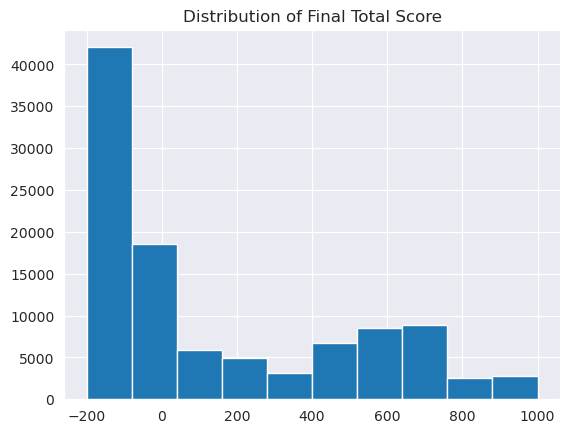

In [57]:
plt.hist(df_encoded_data['total_score'], bins = 10)

plt.title('Distribution of Final Total Score')

plt.grid(True)

plt.show()

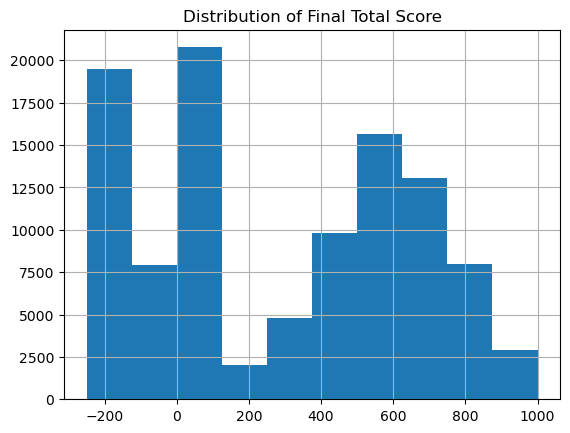

In [169]:
plt.hist(df_encoded_data['total_score'], bins = 10)

plt.title('Distribution of Final Total Score')

plt.grid(True)

plt.show()

### Limit Allocation

In [38]:
df_encoded_data['all_loans'] = 0

df_encoded_data['repayments'] = 1

In [39]:
def calculate_loan_count_bands(df):
    loan_count = df['all_loans']
    
    if loan_count == 0:
        return 'Band 1'
    elif loan_count >= 1 and loan_count <= 2:
        return 'Band 2'
    elif loan_count >= 3 and loan_count <= 5:
        return 'Band 3'
    elif loan_count >= 6 and loan_count <= 9:
        return 'Band 4'
    elif loan_count >= 10:
        return 'Band 5'

In [40]:
def calculate_repayments_bands(df):
    repayments = df['repayments']
    
    if repayments >= 0 and repayments <= 0.29:
        return 'Band 1'
    elif repayments >= 0.30 and repayments <= 0.49:
        return 'Band 2'
    elif repayments >= 0.50 and repayments <= 0.69:
        return 'Band 3'
    elif repayments >= 0.70 and repayments <= 0.89:
        return 'Band 4'
    elif repayments >= 0.90 and repayments <= 0.99:
        return 'Band 5'
    elif repayments >= 1.00:
        return 'Band 6'

def calculate_probability_bands(df):
    probability = df['probability']
    
    if probability >= 0 and probability <= 0.29:
        return 'Band 1'
    elif probability >= 0.30 and probability <= 0.49:
        return 'Band 2'
    elif probability >= 0.50 and probability <= 0.69:
        return 'Band 3'
    elif probability >= 0.70 and probability <= 0.84:
        return 'Band 4'
    elif probability >= 0.85 and probability <= .94:
        return 'Band 5'
    elif probability >= 0.95 and probability <= 1.00:
        return 'Band 6'

In [41]:
df_encoded_data['loan_band'] = df_encoded_data.apply(lambda x : calculate_loan_count_bands(x), axis = 1)

df_encoded_data['repayments_band'] = df_encoded_data.apply(lambda x : calculate_repayments_bands(x), axis = 1)

#df_encoded_data['probability_band'] = df_encoded_data.apply(lambda x : calculate_probability_bands(x), axis = 1)


df_encoded_data.head(3)

kyc_merchant_type  profile  age_on_network_months  \
0               0.36     0.33                  12.00   
1               0.36     0.30                  17.00   
2               0.36     0.30                   6.00   

   months_since_first_activity  days_since_first_activity  \
0                        11.00                     323.00   
1                        15.00                     471.00   
2                         5.00                     150.00   

   days_btwn_joining_and_first_activity_date  days_since_last_pay_in  \
0                                      11.00                    0.00   
1                                       6.00                    0.00   
2                                      13.00                    0.00   

   days_since_last_payout_to_mobile_money  days_since_last_payout_to_bank  \
0                                   -4.00                            0.00   
1                                   -4.00                            0.00   
2                                   -4.00                            0.00   

   trading_consistency  average_daily_transacted_amount_last_6_months  \
0                 0.92                                      106762.78   
1                 0.88                                      288937.22   
2                 0.70                                      342552.00   

   average_daily_transacted_amount_last_3_months  \
0                                      110822.22   
1                                      324032.22   
2                                      452864.44   

   average_daily_transacted_amount_last_1_months  \
0                                      103753.33   
1                                      295948.33   
2                                      245050.00   

   ratio_average_daily_transacted_amount_last_1/6_months  \
0                                               0.97       
1                                               1.02       
2                                               0.72       

   ratio_average_daily_transacted_amount_last_1/3_months  \
0                                               0.94       
1                                               0.91       
2                                               0.54       

   ratio_average_daily_transacted_amount_last_3/6_months  \
0                                               1.04       
1                                               1.12       
2                                               1.32       

   std_average_daily_transacted_amount_last_1/6_months  \
0                                            1504.72     
1                                            3505.56     
2                                           48751.00     

   std_average_daily_transacted_amount_last_1/3_months  \
0                                            3534.44     
1                                           14041.94     
2                                          103907.22     

   std_average_daily_transacted_amount_last_3/6_months  \
0                                            2029.72     
1                                           17547.50     
2                                           55156.22     

   average_transaction_size_last_6_months  \
0                                37978.85   
1                               112329.80   
2                               226355.95   

   average_transaction_size_last_3_months  \
0                                36007.22   
1                               115268.38   
2                               257960.76   

   average_transaction_size_last_1_months  \
0                                31761.22   
1                                96504.89   
2                               167079.55   

   ratio_average_trxn_size_last_1/6_months  \
0                                     0.84   
1                                     0.86   
2                                     0.74   

   ratio_average_trxn_size_last_1/3_months  \
0                           

In [42]:
## for 1 day product 50% max of what is allocated for 7 day product

In [43]:
def calculate_21_day_limit_repayments_factor(df):
    """
    Input - loan band and repayment band
    
    Function - Calculate limit factor based on inputs (limit matrix)
    
    Output - Limit factor based on inputs
    
    """
    
    loan_band = df['loan_band']
    repayment_band = df['repayments_band'] ## repayment by end_rollover_date --> maximum achievable hurdle rates 
    
    
    if loan_band == 'Band 1':
        return 0.245
    elif loan_band == 'Band 2' and repayment_band == 'Band 4':
        return 0.203
    elif loan_band == 'Band 2' and repayment_band == 'Band 5':
        return 0.255
    elif loan_band == 'Band 2' and repayment_band == 'Band 6':
        return 0.263
    elif loan_band == 'Band 3' and repayment_band == 'Band 4':
        return 0.223
    elif loan_band == 'Band 3' and repayment_band == 'Band 5':
        return 0.275
    elif loan_band == 'Band 3' and repayment_band == 'Band 6':
        return 0.280
    elif loan_band == 'Band 4' and repayment_band == 'Band 4':
        return 0.243
    elif loan_band == 'Band 4' and repayment_band == 'Band 5':
        return 0.295
    elif loan_band == 'Band 4' and repayment_band == 'Band 6':
        return 0.298
    elif loan_band == 'Band 5' and repayment_band == 'Band 4':
        return 0.263
    elif loan_band == 'Band 5' and repayment_band == 'Band 5':
        return 0.315
    elif loan_band == 'Band 5' and repayment_band == 'Band 6':
        return 0.350
    else:
        return 0.0

In [44]:
def calculate_7_day_limit_repayments_factor(df):
    """
    Input - loan band and repayment band
    
    Function - Calculate limit factor based on inputs (limit matrix)
    
    Output - Limit factor based on inputs
    
    """
    
    loan_band = df['loan_band']
    repayment_band = df['repayments_band'] ## repayment by end_rollover_date --> maximum achievable hurdle rates 
    
    
    if loan_band == 'Band 1':
        return 0.119
    elif loan_band == 'Band 2' and repayment_band == 'Band 4':
        return 0.083
    elif loan_band == 'Band 2' and repayment_band == 'Band 5':
        return 0.108
    elif loan_band == 'Band 2' and repayment_band == 'Band 6':
        return 0.128
    elif loan_band == 'Band 3' and repayment_band == 'Band 4':
        return 0.098
    elif loan_band == 'Band 3' and repayment_band == 'Band 5':
        return 0.123
    elif loan_band == 'Band 3' and repayment_band == 'Band 6':
        return 0.136
    elif loan_band == 'Band 4' and repayment_band == 'Band 4':
        return 0.113
    elif loan_band == 'Band 4' and repayment_band == 'Band 5':
        return 0.138
    elif loan_band == 'Band 4' and repayment_band == 'Band 6':
        return 0.145
    elif loan_band == 'Band 5' and repayment_band == 'Band 4':
        return 0.128
    elif loan_band == 'Band 5' and repayment_band == 'Band 5':
        return 0.153
    elif loan_band == 'Band 5' and repayment_band == 'Band 6':
        return 0.170
    else:
        return 0.0

In [45]:
def calculate_1_day_limit_repayments_factor(df):
    """
    Input - seven_day_limit_factor
    
    Function - Calculate limit factor based on inputs (seven_day_limit_factor)
    
    Output - Limit factor based on inputs
    
    """
    
    seven_day_limit_factor = df['seven_day_limit_factor']
    
    
    one_day_limit_factor = round((seven_day_limit_factor / 2),3)
    
    
    return one_day_limit_factor

def calculate_7_day_limit_probabilities_factor(df):
    """
    Input - loan band and repayment band
    
    Function - Calculate limit factor based on inputs (limit matrix)
    
    Output - Limit factor based on inputs
    
    """
    
    loan_band = df['loan_band']
    probability_band = df['probability_band']
    
    
    if loan_band == 'Band 1':
        return 0.119
    elif loan_band == 'Band 2' and probability_band == 'Band 4':
        return 0.083
    elif loan_band == 'Band 2' and probability_band == 'Band 5':
        return 0.108
    elif loan_band == 'Band 2' and probability_band == 'Band 6':
        return 0.128
    elif loan_band == 'Band 3' and probability_band == 'Band 4':
        return 0.098
    elif loan_band == 'Band 3' and probability_band == 'Band 5':
        return 0.123
    elif loan_band == 'Band 3' and probability_band == 'Band 6':
        return 0.136
    elif loan_band == 'Band 4' and probability_band == 'Band 4':
        return 0.113
    elif loan_band == 'Band 4' and probability_band == 'Band 5':
        return 0.138
    elif loan_band == 'Band 4' and probability_band == 'Band 6':
        return 0.145
    elif loan_band == 'Band 5' and probability_band == 'Band 4':
        return 0.128
    elif loan_band == 'Band 5' and probability_band == 'Band 5':
        return 0.153
    elif loan_band == 'Band 5' and probability_band == 'Band 6':
        return 0.17
    else:
        return 0.0

In [46]:
df_encoded_data['twenty_one_day_limit_factor'] = df_encoded_data.apply(lambda x : calculate_21_day_limit_repayments_factor(x), axis = 1)

df_encoded_data['seven_day_limit_factor'] = df_encoded_data.apply(lambda x : calculate_7_day_limit_repayments_factor(x), axis = 1)

df_encoded_data['one_day_limit_factor'] = df_encoded_data.apply(lambda x : calculate_1_day_limit_repayments_factor(x), axis = 1)


#df_encoded_data['limit_factor_probability'] = df_encoded_data.apply(lambda x : calculate_7_day_limit_probabilities_factor(x), axis = 1)

df_encoded_data.head(3)

kyc_merchant_type  profile  age_on_network_months  \
0               0.36     0.33                  12.00   
1               0.36     0.30                  17.00   
2               0.36     0.30                   6.00   

   months_since_first_activity  days_since_first_activity  \
0                        11.00                     323.00   
1                        15.00                     471.00   
2                         5.00                     150.00   

   days_btwn_joining_and_first_activity_date  days_since_last_pay_in  \
0                                      11.00                    0.00   
1                                       6.00                    0.00   
2                                      13.00                    0.00   

   days_since_last_payout_to_mobile_money  days_since_last_payout_to_bank  \
0                                   -4.00                            0.00   
1                                   -4.00                            0.00   
2                                   -4.00                            0.00   

   trading_consistency  average_daily_transacted_amount_last_6_months  \
0                 0.92                                      106762.78   
1                 0.88                                      288937.22   
2                 0.70                                      342552.00   

   average_daily_transacted_amount_last_3_months  \
0                                      110822.22   
1                                      324032.22   
2                                      452864.44   

   average_daily_transacted_amount_last_1_months  \
0                                      103753.33   
1                                      295948.33   
2                                      245050.00   

   ratio_average_daily_transacted_amount_last_1/6_months  \
0                                               0.97       
1                                               1.02       
2                                               0.72       

   ratio_average_daily_transacted_amount_last_1/3_months  \
0                                               0.94       
1                                               0.91       
2                                               0.54       

   ratio_average_daily_transacted_amount_last_3/6_months  \
0                                               1.04       
1                                               1.12       
2                                               1.32       

   std_average_daily_transacted_amount_last_1/6_months  \
0                                            1504.72     
1                                            3505.56     
2                                           48751.00     

   std_average_daily_transacted_amount_last_1/3_months  \
0                                            3534.44     
1                                           14041.94     
2                                          103907.22     

   std_average_daily_transacted_amount_last_3/6_months  \
0                                            2029.72     
1                                           17547.50     
2                                           55156.22     

   average_transaction_size_last_6_months  \
0                                37978.85   
1                               112329.80   
2                               226355.95   

   average_transaction_size_last_3_months  \
0                                36007.22   
1                               115268.38   
2                               257960.76   

   average_transaction_size_last_1_months  \
0                                31761.22   
1                                96504.89   
2                               167079.55   

   ratio_average_trxn_size_last_1/6_months  \
0                                     0.84   
1                                     0.86   
2                                     0.74   

   ratio_average_trxn_size_last_1/3_months  \
0                           

In [47]:
df_encoded_data['minimum_21_day_limit_on_6_months'] = (df_encoded_data['average_daily_transacted_amount_last_6_months'] * 30) * df_encoded_data['twenty_one_day_limit_factor'] 

df_encoded_data['minimum_21_day_limit_on_3_months'] = (df_encoded_data['average_daily_transacted_amount_last_3_months'] * 30) * df_encoded_data['twenty_one_day_limit_factor'] 

df_encoded_data['minimum_21_day_limit_on_1_months'] = (df_encoded_data['average_daily_transacted_amount_last_1_months'] * 30) * df_encoded_data['twenty_one_day_limit_factor'] 

df_encoded_data.head(2)

kyc_merchant_type  profile  age_on_network_months  \
0               0.36     0.33                  12.00   
1               0.36     0.30                  17.00   

   months_since_first_activity  days_since_first_activity  \
0                        11.00                     323.00   
1                        15.00                     471.00   

   days_btwn_joining_and_first_activity_date  days_since_last_pay_in  \
0                                      11.00                    0.00   
1                                       6.00                    0.00   

   days_since_last_payout_to_mobile_money  days_since_last_payout_to_bank  \
0                                   -4.00                            0.00   
1                                   -4.00                            0.00   

   trading_consistency  average_daily_transacted_amount_last_6_months  \
0                 0.92                                      106762.78   
1                 0.88                                      288937.22   

   average_daily_transacted_amount_last_3_months  \
0                                      110822.22   
1                                      324032.22   

   average_daily_transacted_amount_last_1_months  \
0                                      103753.33   
1                                      295948.33   

   ratio_average_daily_transacted_amount_last_1/6_months  \
0                                               0.97       
1                                               1.02       

   ratio_average_daily_transacted_amount_last_1/3_months  \
0                                               0.94       
1                                               0.91       

   ratio_average_daily_transacted_amount_last_3/6_months  \
0                                               1.04       
1                                               1.12       

   std_average_daily_transacted_amount_last_1/6_months  \
0                                            1504.72     
1                                            3505.56     

   std_average_daily_transacted_amount_last_1/3_months  \
0                                            3534.44     
1                                           14041.94     

   std_average_daily_transacted_amount_last_3/6_months  \
0                                            2029.72     
1                                           17547.50     

   average_transaction_size_last_6_months  \
0                                37978.85   
1                               112329.80   

   average_transaction_size_last_3_months  \
0                                36007.22   
1                               115268.38   

   average_transaction_size_last_1_months  \
0                                31761.22   
1                                96504.89   

   ratio_average_trxn_size_last_1/6_months  \
0                                     0.84   
1                                     0.86   

   ratio_average_trxn_size_last_1/3_months  \
0                                     0.88   
1                                     0.84   

   ratio_average_trxn_size_last_3/6_months  \
0                                     0.95   
1                                     1.03   

   std_average_trxn_size_last_1/6_months  \
0                                3108.81   
1                                7912.46   

   std_average_trxn_size_last_1/3_months  \
0                                2123.00   
1                                9381.74   

   std_average_trxn_size_last_3/6_months  count_of_transactions_last_6_months  \
0                                 985.82                               506.00   
1                                1469.29                               463.00   

   count_of_transactions_last_3_months  count_of_transactions_last_1_months  \
0                               277.00                                98.00   
1                               253.00                                92.00   

   average_daily_transacti

In [48]:
df_encoded_data['minimum_7_day_limit_on_6_months'] = (df_encoded_data['average_daily_transacted_amount_last_6_months'] * 30) * df_encoded_data['seven_day_limit_factor'] 

df_encoded_data['minimum_7_day_limit_on_3_months'] = (df_encoded_data['average_daily_transacted_amount_last_3_months'] * 30) * df_encoded_data['seven_day_limit_factor'] 

df_encoded_data['minimum_7_day_limit_on_1_months'] = (df_encoded_data['average_daily_transacted_amount_last_1_months'] * 30) * df_encoded_data['seven_day_limit_factor'] 

df_encoded_data.head(2)

kyc_merchant_type  profile  age_on_network_months  \
0               0.36     0.33                  12.00   
1               0.36     0.30                  17.00   

   months_since_first_activity  days_since_first_activity  \
0                        11.00                     323.00   
1                        15.00                     471.00   

   days_btwn_joining_and_first_activity_date  days_since_last_pay_in  \
0                                      11.00                    0.00   
1                                       6.00                    0.00   

   days_since_last_payout_to_mobile_money  days_since_last_payout_to_bank  \
0                                   -4.00                            0.00   
1                                   -4.00                            0.00   

   trading_consistency  average_daily_transacted_amount_last_6_months  \
0                 0.92                                      106762.78   
1                 0.88                                      288937.22   

   average_daily_transacted_amount_last_3_months  \
0                                      110822.22   
1                                      324032.22   

   average_daily_transacted_amount_last_1_months  \
0                                      103753.33   
1                                      295948.33   

   ratio_average_daily_transacted_amount_last_1/6_months  \
0                                               0.97       
1                                               1.02       

   ratio_average_daily_transacted_amount_last_1/3_months  \
0                                               0.94       
1                                               0.91       

   ratio_average_daily_transacted_amount_last_3/6_months  \
0                                               1.04       
1                                               1.12       

   std_average_daily_transacted_amount_last_1/6_months  \
0                                            1504.72     
1                                            3505.56     

   std_average_daily_transacted_amount_last_1/3_months  \
0                                            3534.44     
1                                           14041.94     

   std_average_daily_transacted_amount_last_3/6_months  \
0                                            2029.72     
1                                           17547.50     

   average_transaction_size_last_6_months  \
0                                37978.85   
1                               112329.80   

   average_transaction_size_last_3_months  \
0                                36007.22   
1                               115268.38   

   average_transaction_size_last_1_months  \
0                                31761.22   
1                                96504.89   

   ratio_average_trxn_size_last_1/6_months  \
0                                     0.84   
1                                     0.86   

   ratio_average_trxn_size_last_1/3_months  \
0                                     0.88   
1                                     0.84   

   ratio_average_trxn_size_last_3/6_months  \
0                                     0.95   
1                                     1.03   

   std_average_trxn_size_last_1/6_months  \
0                                3108.81   
1                                7912.46   

   std_average_trxn_size_last_1/3_months  \
0                                2123.00   
1                                9381.74   

   std_average_trxn_size_last_3/6_months  count_of_transactions_last_6_months  \
0                                 985.82                               506.00   
1                                1469.29                               463.00   

   count_of_transactions_last_3_months  count_of_transactions_last_1_months  \
0                               277.00                                98.00   
1                               253.00                                92.00   

   average_daily_transacti

In [49]:
df_encoded_data['minimum_1_day_limit_on_6_months'] = (df_encoded_data['average_daily_transacted_amount_last_6_months'] * 30) * df_encoded_data['one_day_limit_factor'] 

df_encoded_data['minimum_1_day_limit_on_3_months'] = (df_encoded_data['average_daily_transacted_amount_last_3_months'] * 30) * df_encoded_data['one_day_limit_factor'] 

df_encoded_data['minimum_1_day_limit_on_1_months'] = (df_encoded_data['average_daily_transacted_amount_last_1_months'] * 30) * df_encoded_data['one_day_limit_factor'] 

df_encoded_data.head(2)

kyc_merchant_type  profile  age_on_network_months  \
0               0.36     0.33                  12.00   
1               0.36     0.30                  17.00   

   months_since_first_activity  days_since_first_activity  \
0                        11.00                     323.00   
1                        15.00                     471.00   

   days_btwn_joining_and_first_activity_date  days_since_last_pay_in  \
0                                      11.00                    0.00   
1                                       6.00                    0.00   

   days_since_last_payout_to_mobile_money  days_since_last_payout_to_bank  \
0                                   -4.00                            0.00   
1                                   -4.00                            0.00   

   trading_consistency  average_daily_transacted_amount_last_6_months  \
0                 0.92                                      106762.78   
1                 0.88                                      288937.22   

   average_daily_transacted_amount_last_3_months  \
0                                      110822.22   
1                                      324032.22   

   average_daily_transacted_amount_last_1_months  \
0                                      103753.33   
1                                      295948.33   

   ratio_average_daily_transacted_amount_last_1/6_months  \
0                                               0.97       
1                                               1.02       

   ratio_average_daily_transacted_amount_last_1/3_months  \
0                                               0.94       
1                                               0.91       

   ratio_average_daily_transacted_amount_last_3/6_months  \
0                                               1.04       
1                                               1.12       

   std_average_daily_transacted_amount_last_1/6_months  \
0                                            1504.72     
1                                            3505.56     

   std_average_daily_transacted_amount_last_1/3_months  \
0                                            3534.44     
1                                           14041.94     

   std_average_daily_transacted_amount_last_3/6_months  \
0                                            2029.72     
1                                           17547.50     

   average_transaction_size_last_6_months  \
0                                37978.85   
1                               112329.80   

   average_transaction_size_last_3_months  \
0                                36007.22   
1                               115268.38   

   average_transaction_size_last_1_months  \
0                                31761.22   
1                                96504.89   

   ratio_average_trxn_size_last_1/6_months  \
0                                     0.84   
1                                     0.86   

   ratio_average_trxn_size_last_1/3_months  \
0                                     0.88   
1                                     0.84   

   ratio_average_trxn_size_last_3/6_months  \
0                                     0.95   
1                                     1.03   

   std_average_trxn_size_last_1/6_months  \
0                                3108.81   
1                                7912.46   

   std_average_trxn_size_last_1/3_months  \
0                                2123.00   
1                                9381.74   

   std_average_trxn_size_last_3/6_months  count_of_transactions_last_6_months  \
0                                 985.82                               506.00   
1                                1469.29                               463.00   

   count_of_transactions_last_3_months  count_of_transactions_last_1_months  \
0                               277.00                                98.00   
1                               253.00                                92.00   

   average_daily_transacti

df_encoded_data['minimum_limit_on_6_months_probability'] = df_encoded_data['average_monthly_revenue_last_6_months'] * df_encoded_data['limit_factor_probability'] 

df_encoded_data['minimum_limit_on_3_months_probability'] = df_encoded_data['average_monthly_revenue_last_3_months'] * df_encoded_data['limit_factor_probability'] 

df_encoded_data['minimum_limit_on_1_months_probability'] = df_encoded_data['average_monthly_revenue_last_1_months'] * df_encoded_data['limit_factor_probability'] 

df_encoded_data.head(2)

In [50]:
import math as math

def round_off(n):
    """
    This function rounds off elements by setting a ceiling to the next 100
    """
    return int(math.ceil(n / 100.0)) * 100

In [51]:
def amounts_cap_1_day_product(n):
    if n < 50000:
        return 0
    elif n > 4000000:
        return 4000000
    else:
        return n

In [52]:
def amounts_cap_7_day_product(n):
    if n < 500000:
        return 0
    elif n > 6000000:
        return 6000000
    else:
        return n

In [53]:
def amounts_cap_7_day_product_with_200_min(n):
    if n < 200000:
        return 0
    elif n > 6000000:
        return 6000000
    else:
        return n

In [54]:
def amounts_cap_21_day_product(n):
    if n < 500000:
        return 0
    elif n > 10000000:
        return 10000000
    else:
        return n

In [55]:
## round off limits
df_encoded_data['rounded_21_day_limit_on_6_months'] = df_encoded_data['minimum_21_day_limit_on_6_months'].apply(round_off)

df_encoded_data['rounded_21_day_limit_on_3_months'] = df_encoded_data['minimum_21_day_limit_on_3_months'].apply(round_off)

df_encoded_data['rounded_21_day_limit_on_1_months'] = df_encoded_data['minimum_21_day_limit_on_1_months'].apply(round_off)


df_encoded_data['rounded_7_day_limit_on_6_months'] = df_encoded_data['minimum_7_day_limit_on_6_months'].apply(round_off)

df_encoded_data['rounded_7_day_limit_on_3_months'] = df_encoded_data['minimum_7_day_limit_on_3_months'].apply(round_off)

df_encoded_data['rounded_7_day_limit_on_1_months'] = df_encoded_data['minimum_7_day_limit_on_1_months'].apply(round_off)


df_encoded_data['rounded_1_day_limit_on_6_months'] = df_encoded_data['minimum_1_day_limit_on_6_months'].apply(round_off)

df_encoded_data['rounded_1_day_limit_on_3_months'] = df_encoded_data['minimum_1_day_limit_on_3_months'].apply(round_off)

df_encoded_data['rounded_1_day_limit_on_1_months'] = df_encoded_data['minimum_1_day_limit_on_1_months'].apply(round_off)


## apply limit caps

df_encoded_data['final_21_day_limit_on_6_months'] = df_encoded_data['rounded_21_day_limit_on_6_months'].apply(amounts_cap_21_day_product)

df_encoded_data['final_21_day_limit_on_3_months'] = df_encoded_data['rounded_21_day_limit_on_3_months'].apply(amounts_cap_21_day_product)

df_encoded_data['final_21_day_limit_on_1_months'] = df_encoded_data['rounded_21_day_limit_on_1_months'].apply(amounts_cap_21_day_product)


df_encoded_data['final_7_day_limit_on_6_months'] = df_encoded_data['rounded_7_day_limit_on_6_months'].apply(amounts_cap_7_day_product)

df_encoded_data['final_7_day_limit_on_3_months'] = df_encoded_data['rounded_7_day_limit_on_3_months'].apply(amounts_cap_7_day_product)

df_encoded_data['final_7_day_limit_on_1_months'] = df_encoded_data['rounded_7_day_limit_on_1_months'].apply(amounts_cap_7_day_product)


df_encoded_data['final_7_day_limit_on_6_months_200_min'] = df_encoded_data['rounded_7_day_limit_on_6_months'].apply(amounts_cap_7_day_product_with_200_min)

df_encoded_data['final_7_day_limit_on_3_months_200_min'] = df_encoded_data['rounded_7_day_limit_on_3_months'].apply(amounts_cap_7_day_product_with_200_min)

df_encoded_data['final_7_day_limit_on_1_months_200_min'] = df_encoded_data['rounded_7_day_limit_on_1_months'].apply(amounts_cap_7_day_product_with_200_min)


# df_encoded_data['final_7_day_limit_on_6_months_probability'] = df_encoded_data['rounded_limit_on_6_months_probability'].apply(amounts_cap_7_day_product)

# df_encoded_data['final_7_day_limit_on_3_months_probability'] = df_encoded_data['rounded_limit_on_3_months_probability'].apply(amounts_cap_7_day_product)

# df_encoded_data['final_7_day_limit_on_1_months_probability'] = df_encoded_data['rounded_limit_on_1_months_probability'].apply(amounts_cap_7_day_product)



df_encoded_data['final_1_day_limit_on_6_months'] = df_encoded_data['rounded_1_day_limit_on_6_months'].apply(amounts_cap_1_day_product)

df_encoded_data['final_1_day_limit_on_3_months'] = df_encoded_data['rounded_1_day_limit_on_3_months'].apply(amounts_cap_1_day_product)

df_encoded_data['final_1_day_limit_on_1_months'] = df_encoded_data['rounded_1_day_limit_on_1_months'].apply(amounts_cap_1_day_product)


# df_encoded_data['final_1_day_limit_on_6_months_probability'] = df_encoded_data['rounded_limit_on_6_months_probability'].apply(amounts_cap_1_day_product)

# df_encoded_data['final_1_day_limit_on_3_months_probability'] = df_encoded_data['rounded_limit_on_3_months_probability'].apply(amounts_cap_1_day_product)

# df_encoded_data['final_1_day_limit_on_1_months_probability'] = df_encoded_data['rounded_limit_on_1_months_probability'].apply(amounts_cap_1_day_product)




df_encoded_data.head(3)

kyc_merchant_type  profile  age_on_network_months  \
0               0.36     0.33                  12.00   
1               0.36     0.30                  17.00   
2               0.36     0.30                   6.00   

   months_since_first_activity  days_since_first_activity  \
0                        11.00                     323.00   
1                        15.00                     471.00   
2                         5.00                     150.00   

   days_btwn_joining_and_first_activity_date  days_since_last_pay_in  \
0                                      11.00                    0.00   
1                                       6.00                    0.00   
2                                      13.00                    0.00   

   days_since_last_payout_to_mobile_money  days_since_last_payout_to_bank  \
0                                   -4.00                            0.00   
1                                   -4.00                            0.00   
2                                   -4.00                            0.00   

   trading_consistency  average_daily_transacted_amount_last_6_months  \
0                 0.92                                      106762.78   
1                 0.88                                      288937.22   
2                 0.70                                      342552.00   

   average_daily_transacted_amount_last_3_months  \
0                                      110822.22   
1                                      324032.22   
2                                      452864.44   

   average_daily_transacted_amount_last_1_months  \
0                                      103753.33   
1                                      295948.33   
2                                      245050.00   

   ratio_average_daily_transacted_amount_last_1/6_months  \
0                                               0.97       
1                                               1.02       
2                                               0.72       

   ratio_average_daily_transacted_amount_last_1/3_months  \
0                                               0.94       
1                                               0.91       
2                                               0.54       

   ratio_average_daily_transacted_amount_last_3/6_months  \
0                                               1.04       
1                                               1.12       
2                                               1.32       

   std_average_daily_transacted_amount_last_1/6_months  \
0                                            1504.72     
1                                            3505.56     
2                                           48751.00     

   std_average_daily_transacted_amount_last_1/3_months  \
0                                            3534.44     
1                                           14041.94     
2                                          103907.22     

   std_average_daily_transacted_amount_last_3/6_months  \
0                                            2029.72     
1                                           17547.50     
2                                           55156.22     

   average_transaction_size_last_6_months  \
0                                37978.85   
1                               112329.80   
2                               226355.95   

   average_transaction_size_last_3_months  \
0                                36007.22   
1                               115268.38   
2                               257960.76   

   average_transaction_size_last_1_months  \
0                                31761.22   
1                                96504.89   
2                               167079.55   

   ratio_average_trxn_size_last_1/6_months  \
0                                     0.84   
1                                     0.86   
2                                     0.74   

   ratio_average_trxn_size_last_1/3_months  \
0                           

In [56]:
df_encoded_data['final_7_day_limit_on_6_months'].sum()

6492903000

In [57]:
df_encoded_data['pilot_final_21_day_limit_on_6_months'] = round(df_encoded_data['final_21_day_limit_on_6_months'] * 0.5)

df_encoded_data['pilot_final_7_day_limit_on_6_months'] = round(df_encoded_data['final_7_day_limit_on_6_months_200_min'] * 0.5)

df_encoded_data['pilot_final_1_day_limit_on_6_months'] = round(df_encoded_data['final_1_day_limit_on_6_months'] * 0.5)

In [58]:
def check_21_day_product_min_after_50_pc_slash(df):
    
    pilot_twenty_one_day_limit = df['pilot_final_21_day_limit_on_6_months']
    
    if pilot_twenty_one_day_limit < 500000:
        return 500000
    else :
        return pilot_twenty_one_day_limit
    

In [59]:
def check_7_day_product_min_after_50_pc_slash(df):
    
    pilot_seven_one_day_limit = df['pilot_final_7_day_limit_on_6_months']
    
    if pilot_seven_one_day_limit < 200000:
        return 200000
    else :
        return pilot_seven_one_day_limit
    

In [60]:
def check_1_day_product_min_after_50_pc_slash(df):
    
    pilot_one_day_limit = df['pilot_final_1_day_limit_on_6_months']
    
    if pilot_one_day_limit < 50000:
        return 50000
    elif pilot_one_day_limit > 500000:
        return 500000
    else :
        return pilot_one_day_limit
    

In [61]:
df_encoded_data['pilot_final_21_day_limit_on_6_months'] = df_encoded_data.apply(lambda x : check_21_day_product_min_after_50_pc_slash(x), axis = 1)

df_encoded_data['pilot_final_7_day_limit_on_6_months'] = df_encoded_data.apply(lambda x : check_7_day_product_min_after_50_pc_slash(x), axis = 1)

df_encoded_data['pilot_final_1_day_limit_on_6_months'] = df_encoded_data.apply(lambda x : check_1_day_product_min_after_50_pc_slash(x), axis = 1)

df_encoded_data.head(2)

kyc_merchant_type  profile  age_on_network_months  \
0               0.36     0.33                  12.00   
1               0.36     0.30                  17.00   

   months_since_first_activity  days_since_first_activity  \
0                        11.00                     323.00   
1                        15.00                     471.00   

   days_btwn_joining_and_first_activity_date  days_since_last_pay_in  \
0                                      11.00                    0.00   
1                                       6.00                    0.00   

   days_since_last_payout_to_mobile_money  days_since_last_payout_to_bank  \
0                                   -4.00                            0.00   
1                                   -4.00                            0.00   

   trading_consistency  average_daily_transacted_amount_last_6_months  \
0                 0.92                                      106762.78   
1                 0.88                                      288937.22   

   average_daily_transacted_amount_last_3_months  \
0                                      110822.22   
1                                      324032.22   

   average_daily_transacted_amount_last_1_months  \
0                                      103753.33   
1                                      295948.33   

   ratio_average_daily_transacted_amount_last_1/6_months  \
0                                               0.97       
1                                               1.02       

   ratio_average_daily_transacted_amount_last_1/3_months  \
0                                               0.94       
1                                               0.91       

   ratio_average_daily_transacted_amount_last_3/6_months  \
0                                               1.04       
1                                               1.12       

   std_average_daily_transacted_amount_last_1/6_months  \
0                                            1504.72     
1                                            3505.56     

   std_average_daily_transacted_amount_last_1/3_months  \
0                                            3534.44     
1                                           14041.94     

   std_average_daily_transacted_amount_last_3/6_months  \
0                                            2029.72     
1                                           17547.50     

   average_transaction_size_last_6_months  \
0                                37978.85   
1                               112329.80   

   average_transaction_size_last_3_months  \
0                                36007.22   
1                               115268.38   

   average_transaction_size_last_1_months  \
0                                31761.22   
1                                96504.89   

   ratio_average_trxn_size_last_1/6_months  \
0                                     0.84   
1                                     0.86   

   ratio_average_trxn_size_last_1/3_months  \
0                                     0.88   
1                                     0.84   

   ratio_average_trxn_size_last_3/6_months  \
0                                     0.95   
1                                     1.03   

   std_average_trxn_size_last_1/6_months  \
0                                3108.81   
1                                7912.46   

   std_average_trxn_size_last_1/3_months  \
0                                2123.00   
1                                9381.74   

   std_average_trxn_size_last_3/6_months  count_of_transactions_last_6_months  \
0                                 985.82                               506.00   
1                                1469.29                               463.00   

   count_of_transactions_last_3_months  count_of_transactions_last_1_months  \
0                               277.00                                98.00   
1                               253.00                                92.00   

   average_daily_transacti

In [106]:
1031600/2

515800.0

#### Performance of heuristic model

#### 6 Months

#### 21 Day

In [132]:
## New

qualified_on_500 = df_encoded_data[(df_encoded_data['total_score'] >= 500 ) & (df_encoded_data['final_21_day_limit_on_6_months'] > 0)]

print(qualified_on_500.shape)

print(qualified_on_500['final_21_day_limit_on_6_months'].sum())

(3950, 97)
12630736100


In [133]:
groups = pd.cut(qualified_on_500['final_21_day_limit_on_6_months'], [499999, 999999, 1999999, 2999999, 3999999, 4999999, 5999999, 9999999, 19999999])

grp = qualified_on_500.groupby(groups)['final_21_day_limit_on_6_months'].agg(['sum', 'count']).reset_index()

grp

final_21_day_limit_on_6_months         sum  count
0               (499999, 999999]   846124700   1185
1              (999999, 1999999]  1404894400    984
2             (1999999, 2999999]  1094218100    444
3             (2999999, 3999999]  1003027800    290
4             (3999999, 4999999]   713440100    161
5             (4999999, 5999999]   789750600    145
6             (5999999, 9999999]  2239280400    287
7            (9999999, 19999999]  4540000000    454

In [62]:
## New

qualified_on_600 = df_encoded_data[(df_encoded_data['total_score'] >= 600) & (df_encoded_data['final_21_day_limit_on_6_months'] > 0) & (df_encoded_data['pilot_final_21_day_limit_on_6_months'])]

print(qualified_on_600.shape)

print(qualified_on_600['final_21_day_limit_on_6_months'].sum())

print(qualified_on_600['pilot_final_21_day_limit_on_6_months'].sum())

(3776, 100)
12329981700
6322137450.0


In [64]:
qualified_on_600[['final_21_day_limit_on_6_months','pilot_final_21_day_limit_on_6_months']].describe().T

count       mean        std       min  \
final_21_day_limit_on_6_months       3776.00 3265355.32 3187601.09 500400.00   
pilot_final_21_day_limit_on_6_months 3776.00 1674294.88 1561009.20 500000.00   

                                           25%        50%        75%  \
final_21_day_limit_on_6_months       891675.00 1777100.00 4434550.00   
pilot_final_21_day_limit_on_6_months 500000.00  888550.00 2217275.00   

                                             max  
final_21_day_limit_on_6_months       10000000.00  
pilot_final_21_day_limit_on_6_months  5000000.00

In [119]:
groups = pd.cut(qualified_on_600['pilot_final_21_day_limit_on_6_months'], [499999, 699999, 999999, 1999999, 2999999, 3999999, 4999999, 5999999])

grp = qualified_on_600.groupby(groups)['pilot_final_21_day_limit_on_6_months'].agg(['sum', 'count']).reset_index()

grp

pilot_final_21_day_limit_on_6_months           sum  count
0                     (499999, 699999]  828326150.00   1568
1                     (699999, 999999]  390664900.00    467
2                    (999999, 1999999] 1009628100.00    708
3                   (1999999, 2999999]  735442000.00    300
4                   (2999999, 3999999]  572856200.00    165
5                   (3999999, 4999999]  525220100.00    116
6                   (4999999, 5999999] 2260000000.00    452

In [123]:
## New

qualified_on_700 = df_encoded_data[(df_encoded_data['total_score'] >= 750 ) & (df_encoded_data['final_21_day_limit_on_6_months'] > 0) & (df_encoded_data['pilot_final_21_day_limit_on_6_months'])]

print(qualified_on_700.shape)

print(qualified_on_700['final_21_day_limit_on_6_months'].sum())

print(qualified_on_700['pilot_final_21_day_limit_on_6_months'].sum())

(3204, 100)
11234616300
5739451800.0


In [124]:
qualified_on_700[['final_21_day_limit_on_6_months','pilot_final_21_day_limit_on_6_months']].describe().T

count       mean        std       min  \
final_21_day_limit_on_6_months       3204.00 3506434.55 3296342.66 500400.00   
pilot_final_21_day_limit_on_6_months 3204.00 1791339.51 1616364.33 500000.00   

                                           25%        50%        75%  \
final_21_day_limit_on_6_months       950275.00 1993800.00 5135700.00   
pilot_final_21_day_limit_on_6_months 500000.00  996900.00 2567850.00   

                                             max  
final_21_day_limit_on_6_months       10000000.00  
pilot_final_21_day_limit_on_6_months  5000000.00

In [125]:
groups = pd.cut(qualified_on_700['pilot_final_21_day_limit_on_6_months'], [499999, 999999, 1999999, 2999999, 3999999, 4999999, 5999999]) #9999999, 19999999

grp = qualified_on_700.groupby(groups)['pilot_final_21_day_limit_on_6_months'].agg(['sum', 'count']).reset_index()

grp

pilot_final_21_day_limit_on_6_months           sum  count
0                     (499999, 999999]  963542150.00   1606
1                    (999999, 1999999]  896470450.00    627
2                   (1999999, 2999999]  672415400.00    274
3                   (2999999, 3999999]  518776750.00    149
4                   (3999999, 4999999]  493247050.00    109
5                   (4999999, 5999999] 2195000000.00    439

In [126]:
## New

qualified_on_800 = df_encoded_data[(df_encoded_data['total_score'] >= 800 ) & (df_encoded_data['final_21_day_limit_on_6_months'] > 0) & (df_encoded_data['pilot_final_21_day_limit_on_6_months'])]

print(qualified_on_800.shape)

print(qualified_on_800['final_21_day_limit_on_6_months'].sum())

print(qualified_on_800['pilot_final_21_day_limit_on_6_months'].sum())

(2836, 100)
10514076400
5356218100.0


In [127]:
groups = pd.cut(qualified_on_800['pilot_final_21_day_limit_on_6_months'], [499999, 999999, 1999999, 2999999, 3999999, 4999999, 5999999]) #9999999, 19999999

grp = qualified_on_800.groupby(groups)['pilot_final_21_day_limit_on_6_months'].agg(['sum', 'count']).reset_index()

grp

pilot_final_21_day_limit_on_6_months           sum  count
0                     (499999, 999999]  809757300.00   1343
1                    (999999, 1999999]  802739550.00    560
2                   (1999999, 2999999]  631215550.00    257
3                   (2999999, 3999999]  497750800.00    143
4                   (3999999, 4999999]  484754900.00    107
5                   (4999999, 5999999] 2130000000.00    426

In [128]:
## New

qualified_on_900 = df_encoded_data[(df_encoded_data['total_score'] >= 900 ) & (df_encoded_data['final_21_day_limit_on_6_months'] > 0) & (df_encoded_data['pilot_final_21_day_limit_on_6_months'])]

print(qualified_on_900.shape)

print(qualified_on_900['final_21_day_limit_on_6_months'].sum())

print(qualified_on_900['pilot_final_21_day_limit_on_6_months'].sum())

(2016, 100)
8297220200
4207944600.0


In [129]:
groups = pd.cut(qualified_on_900['pilot_final_21_day_limit_on_6_months'], [499999, 999999, 1999999, 2999999, 3999999, 4999999, 5999999]) #9999999, 19999999

grp = qualified_on_900.groupby(groups)['pilot_final_21_day_limit_on_6_months'].agg(['sum', 'count']).reset_index()

grp

pilot_final_21_day_limit_on_6_months           sum  count
0                     (499999, 999999]  522178850.00    855
1                    (999999, 1999999]  565233450.00    393
2                   (1999999, 2999999]  492032650.00    200
3                   (2999999, 3999999]  402091450.00    115
4                   (3999999, 4999999]  396408200.00     87
5                   (4999999, 5999999] 1830000000.00    366

#### 7 Day

In [93]:
## New

print(df_encoded_data[(df_encoded_data['total_score'] >= 600 ) &
    (df_encoded_data['final_7_day_limit_on_6_months'] > 0)].shape)

print(df_encoded_data[(df_encoded_data['total_score'] >= 600 ) &
    (df_encoded_data['final_7_day_limit_on_6_months'] > 0)]['final_7_day_limit_on_6_months'].sum())

(2643, 97)
6055596200


In [135]:
## New

qualified_on_600 = df_encoded_data[(df_encoded_data['total_score'] >= 600 ) & (df_encoded_data['final_7_day_limit_on_6_months_200_min'] > 0) & (df_encoded_data['pilot_final_7_day_limit_on_6_months'])]


print(qualified_on_600.shape)

print(qualified_on_600['final_7_day_limit_on_6_months_200_min'].sum())

print(qualified_on_600['pilot_final_7_day_limit_on_6_months'].sum())

(4107, 100)
6526476800
3327858150.0


In [136]:
qualified_on_600[['final_7_day_limit_on_6_months','pilot_final_7_day_limit_on_6_months']].describe().T

count       mean        std       min  \
final_7_day_limit_on_6_months       4107.00 1474457.32 1879290.69      0.00   
pilot_final_7_day_limit_on_6_months 4107.00  810289.30  885928.25 200000.00   

                                          25%       50%        75%        max  
final_7_day_limit_on_6_months            0.00 762300.00 1949600.00 6000000.00  
pilot_final_7_day_limit_on_6_months 200000.00 381150.00  974800.00 3000000.00

In [140]:
groups = pd.cut(qualified_on_600['pilot_final_7_day_limit_on_6_months'], [199999, 499999, 699999, 999999, 1999999, 2999999, 3999999]) #9999999, 19999999

grp = qualified_on_600.groupby(groups)['pilot_final_7_day_limit_on_6_months'].agg(['sum', 'count']).reset_index()

grp

pilot_final_7_day_limit_on_6_months           sum  count
0                    (199999, 499999]  631602500.00   2396
1                    (499999, 699999]  210607900.00    355
2                    (699999, 999999]  289641600.00    348
3                   (999999, 1999999]  630570950.00    450
4                  (1999999, 2999999]  455435200.00    188
5                  (2999999, 3999999] 1110000000.00    370

In [ ]:
## New

qualified_on_600 = df_encoded_data[(df_encoded_data['total_score'] >= 600 ) & (df_encoded_data['final_7_day_limit_on_6_months_200_min'] > 0) & (df_encoded_data['pilot_final_7_day_limit_on_6_months'])]


print(qualified_on_600.shape)

print(qualified_on_600['final_7_day_limit_on_6_months_200_min'].sum())

print(qualified_on_600['pilot_final_7_day_limit_on_6_months'].sum())

In [ ]:
groups = pd.cut(qualified_on_600['pilot_final_7_day_limit_on_6_months'], [199999, 499999, 699999, 999999, 1999999, 2999999, 3999999]) #9999999, 19999999

grp = qualified_on_600.groupby(groups)['pilot_final_7_day_limit_on_6_months'].agg(['sum', 'count']).reset_index()

grp

In [147]:
## New

qualified_on_700 = df_encoded_data[(df_encoded_data['total_score'] >= 700 ) & (df_encoded_data['final_7_day_limit_on_6_months_200_min'] > 0) & (df_encoded_data['pilot_final_7_day_limit_on_6_months'])]


print(qualified_on_700.shape)

print(qualified_on_700['final_7_day_limit_on_6_months_200_min'].sum())

print(qualified_on_700['pilot_final_7_day_limit_on_6_months'].sum())

(3444, 100)
5962443500
3029890050.0


In [148]:
groups = pd.cut(qualified_on_700['pilot_final_7_day_limit_on_6_months'], [199999, 499999, 699999, 999999, 1999999, 2999999, 3999999]) #9999999, 19999999

grp = qualified_on_700.groupby(groups)['pilot_final_7_day_limit_on_6_months'].agg(['sum', 'count']).reset_index()

grp

pilot_final_7_day_limit_on_6_months           sum  count
0                    (199999, 499999]  496059050.00   1871
1                    (499999, 699999]  186742700.00    315
2                    (699999, 999999]  257067050.00    308
3                   (999999, 1999999]  577633800.00    412
4                  (1999999, 2999999]  429387450.00    177
5                  (2999999, 3999999] 1083000000.00    361

In [143]:
## New

qualified_on_800 = df_encoded_data[(df_encoded_data['total_score'] >= 800 ) & (df_encoded_data['final_7_day_limit_on_6_months_200_min'] > 0) & (df_encoded_data['pilot_final_7_day_limit_on_6_months'])]


print(qualified_on_800.shape)

print(qualified_on_800['final_7_day_limit_on_6_months_200_min'].sum())

print(qualified_on_800['pilot_final_7_day_limit_on_6_months'].sum())

(3017, 100)
5587366600
2831619250.0


In [144]:
groups = pd.cut(qualified_on_800['pilot_final_7_day_limit_on_6_months'], [199999, 499999, 699999, 999999, 1999999, 2999999, 3999999]) #9999999, 19999999

grp = qualified_on_800.groupby(groups)['pilot_final_7_day_limit_on_6_months'].agg(['sum', 'count']).reset_index()

grp

pilot_final_7_day_limit_on_6_months           sum  count
0                    (199999, 499999]  413858700.00   1546
1                    (499999, 699999]  163681500.00    277
2                    (699999, 999999]  234130950.00    280
3                   (999999, 1999999]  549360000.00    391
4                  (1999999, 2999999]  417588100.00    172
5                  (2999999, 3999999] 1053000000.00    351

In [145]:
## New

qualified_on_900 = df_encoded_data[(df_encoded_data['total_score'] >= 900 ) & (df_encoded_data['final_7_day_limit_on_6_months_200_min'] > 0) & (df_encoded_data['pilot_final_7_day_limit_on_6_months'])]


print(qualified_on_900.shape)

print(qualified_on_900['final_7_day_limit_on_6_months_200_min'].sum())

print(qualified_on_900['pilot_final_7_day_limit_on_6_months'].sum())

(2120, 100)
4431597000
2237947100.0


In [146]:
groups = pd.cut(qualified_on_900['pilot_final_7_day_limit_on_6_months'], [199999, 499999, 699999, 999999, 1999999, 2999999, 3999999]) #9999999, 19999999

grp = qualified_on_900.groupby(groups)['pilot_final_7_day_limit_on_6_months'].agg(['sum', 'count']).reset_index()

grp

pilot_final_7_day_limit_on_6_months          sum  count
0                    (199999, 499999] 267246600.00    977
1                    (499999, 699999] 109306400.00    186
2                    (699999, 999999] 171172850.00    204
3                   (999999, 1999999] 433304450.00    307
4                  (1999999, 2999999] 350916800.00    144
5                  (2999999, 3999999] 906000000.00    302

#### 1 Day

In [161]:
qualified_on_600 = df_encoded_data[(df_encoded_data['total_score'] >= 600) & (df_encoded_data['final_1_day_limit_on_6_months'] > 0)  & (df_encoded_data['pilot_final_1_day_limit_on_6_months'] > 0)]

print(qualified_on_600.shape)

print(qualified_on_600['final_1_day_limit_on_6_months'].sum())
      
print(qualified_on_600['pilot_final_1_day_limit_on_6_months'].sum())

(5385, 100)
3654408200
1845510000.0


In [162]:
qualified_on_600[['final_1_day_limit_on_6_months','pilot_final_1_day_limit_on_6_months']].describe().T

count      mean        std      min  \
final_1_day_limit_on_6_months       5385.00 678627.34 1018972.30 50000.00   
pilot_final_1_day_limit_on_6_months 5385.00 342713.09  507481.04 50000.00   

                                          25%       50%       75%        max  
final_1_day_limit_on_6_months       102900.00 237900.00 698100.00 4000000.00  
pilot_final_1_day_limit_on_6_months  51450.00 118950.00 349050.00 2000000.00

In [151]:
groups = pd.cut(qualified_on_600['pilot_final_1_day_limit_on_6_months'], [49999, 79999, 99999, 199999, 499999, 699999, 999999, 1999999, 2999999]) #9999999, 19999999

grp = qualified_on_600.groupby(groups)['pilot_final_1_day_limit_on_6_months'].agg(['sum', 'count']).reset_index()

grp

pilot_final_1_day_limit_on_6_months          sum  count
0                      (49999, 79999] 114104850.00   2072
1                      (79999, 99999]  32409550.00    362
2                     (99999, 199999] 140164250.00    977
3                    (199999, 499999] 308888300.00    971
4                    (499999, 699999] 150296350.00    253
5                    (699999, 999999] 160848600.00    193
6                   (999999, 1999999] 410798100.00    293
7                  (1999999, 2999999] 528000000.00    264

In [163]:
qualified_on_700 = df_encoded_data[(df_encoded_data['total_score'] >= 700) & (df_encoded_data['final_1_day_limit_on_6_months'] > 0)  & (df_encoded_data['pilot_final_1_day_limit_on_6_months'] > 0)]

print(qualified_on_700.shape)

print(qualified_on_700['final_1_day_limit_on_6_months'].sum())
      
print(qualified_on_700['pilot_final_1_day_limit_on_6_months'].sum())

(4290, 100)
3339644800
1681646300.0


In [164]:
groups = pd.cut(qualified_on_700['pilot_final_1_day_limit_on_6_months'], [49999, 79999, 99999, 199999, 499999, 699999, 999999, 1999999, 2999999]) #9999999, 19999999

grp = qualified_on_700.groupby(groups)['pilot_final_1_day_limit_on_6_months'].agg(['sum', 'count']).reset_index()

grp

pilot_final_1_day_limit_on_6_months          sum  count
0                      (49999, 79999]  80642850.00   1450
1                      (79999, 99999]  24906100.00    277
2                     (99999, 199999] 111672650.00    779
3                    (199999, 499999] 268960400.00    838
4                    (499999, 699999] 138286050.00    233
5                    (699999, 999999] 146117300.00    175
6                   (999999, 1999999] 389060950.00    277
7                  (1999999, 2999999] 522000000.00    261

In [155]:
qualified_on_800 = df_encoded_data[(df_encoded_data['total_score'] >= 800) & (df_encoded_data['final_1_day_limit_on_6_months'] > 0)  & (df_encoded_data['pilot_final_1_day_limit_on_6_months'] > 0)]

print(qualified_on_800.shape)

print(qualified_on_800['final_1_day_limit_on_6_months'].sum())
      
print(qualified_on_800['pilot_final_1_day_limit_on_6_months'].sum())

(3621, 100)
3127296100
1572098350.0


In [157]:
groups = pd.cut(qualified_on_800['pilot_final_1_day_limit_on_6_months'], [49999, 79999, 99999, 199999, 499999, 699999, 999999, 1999999, 2999999]) #9999999, 19999999

grp = qualified_on_800.groupby(groups)['pilot_final_1_day_limit_on_6_months'].agg(['sum', 'count']).reset_index()

grp

pilot_final_1_day_limit_on_6_months          sum  count
0                      (49999, 79999]  60427250.00   1077
1                      (79999, 99999]  20587800.00    229
2                     (99999, 199999]  93865050.00    656
3                    (199999, 499999] 240955800.00    749
4                    (499999, 699999] 129331100.00    218
5                    (699999, 999999] 141053800.00    169
6                   (999999, 1999999] 379877550.00    270
7                  (1999999, 2999999] 506000000.00    253

In [159]:
qualified_on_900 = df_encoded_data[(df_encoded_data['total_score'] >= 900) & (df_encoded_data['final_1_day_limit_on_6_months'] > 0)  & (df_encoded_data['pilot_final_1_day_limit_on_6_months'] > 0)]

print(qualified_on_900.shape)

print(qualified_on_900['final_1_day_limit_on_6_months'].sum())
      
print(qualified_on_900['pilot_final_1_day_limit_on_6_months'].sum())

(2431, 100)
2492339900
1250454750.0


In [160]:
groups = pd.cut(qualified_on_900['pilot_final_1_day_limit_on_6_months'], [49999, 79999, 99999, 199999, 499999, 699999, 999999, 1999999, 2999999]) #9999999, 19999999

grp = qualified_on_900.groupby(groups)['pilot_final_1_day_limit_on_6_months'].agg(['sum', 'count']).reset_index()

grp

pilot_final_1_day_limit_on_6_months          sum  count
0                      (49999, 79999]  32905550.00    583
1                      (79999, 99999]  13120450.00    146
2                     (99999, 199999]  60831600.00    423
3                    (199999, 499999] 170783100.00    529
4                    (499999, 699999] 101122300.00    170
5                    (699999, 999999] 112220500.00    134
6                   (999999, 1999999] 315471250.00    224
7                  (1999999, 2999999] 444000000.00    222

In [79]:
(df_encoded_data[df_encoded_data['trading_consistency_score'] <= 0].shape[0] / len(df_encoded_data) ) * 100

90.96354842741897

In [80]:
(df_encoded_data[df_encoded_data['age_on_network_score'] <= 0].shape[0] / len(df_encoded_data) ) * 100

44.34091979884809

In [81]:
(df_encoded_data[df_encoded_data['days_since_last_transaction_score'] <= 0].shape[0] / len(df_encoded_data) ) * 100

49.590869318564245

In [82]:
(df_encoded_data[df_encoded_data['ratio_average_daily_transacted_amount_score'] <= 0].shape[0] / len(df_encoded_data) ) * 100

68.9281833828521

In [83]:
(df_encoded_data[df_encoded_data['ratio_average_trxn_size_score'] <= 0].shape[0] / len(df_encoded_data) ) * 100

65.197450024519